Adapted from https://github.com/Specufex/specufex Specufex code

Created Feb 1, 2023
Updated Feb 1, 2023

In [26]:
#imports
from eqcorrscan import Tribe
import obspy
from obspy import Stream
import csv
import numpy as np
import pandas as pd
from glob import glob
import scipy.signal as sp
import yaml
import matplotlib.pyplot as plt

#set parameters
# path = '/home/smocz/expand_redpy_new_files/templates/' #path to .tgz file
# volcano = 'Rainier'
# filename = f'Volcano_{volc}_Network_*_Station_*_Channel_*.tgz' #name of .tgz files to glob
# T = Tribe().read(f'{path}{filename}') #read the .tgz file, use for skipping a the volcano loop

In [56]:
#set parameters
with open('/home/smocz/expand_redpy/scripts/config.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)
    
volc_list_names = config['volc_list_names']
vv = config['vv']
volc = volc_list_names[vv]
filename = f'Volcano_{volc}_Network_*_Station_*_Channel_*.tgz' #name of .tgz files to glob
homedir = config['homedir']
path = homedir+'templates/'

winlen = 40

fs = config['fs']
len_data = 10000
fqmin = config['fqmin']
fqmax = config['fqmax']

# spectrogram parameters
sgramMode='magnitude'
sgramScaling='spectrum'

# frequency/time resolution
nperseg = 64 #affects time resolution
noverlap = nperseg/4
nfft = 1024

## functions

In [4]:
# create window with max possible sum(abs(amplitudes))
# goal is to align stream windows and provide shorter windows without as much noise
def maxwindow(st,winlen): #provide stream object (one trace each) and window length in s
    fs = st[0].stats.sampling_rate
    stt = st[0].stats.starttime
        
    numwindows = round(len(st[0])/fs)-winlen+1 #how many windows will be cycled (+1 is for range)
    print('number of windows:',numwindows-1)

    sum_list = []
    for i in range(0,numwindows):
        tr = st[0].copy() #create copy to avoid trimming st[0]
        tt = tr.trim(stt+i,stt+i+winlen) #trim to a window the length of winlen

        amps_list = []
        for ii in tt: #for each amplitude/point in the trace
            amps_list.append(abs(ii)) #append the amplitude 
        sum_list.append(sum(amps_list)) #sum and save the amplitude for this possible window

    max_inx = sum_list.index(max(sum_list)) #find the index of the window with maximum sum(abs(amplitudes))
    
    print('maximum amp window index:',max_inx) #
    
    final_tr = st[0].copy()
    tr_trim = final_tr.trim(stt+max_inx,stt+max_inx+winlen) #use index to find the window
    print('Max Window:')
    tr_trim.plot();
    
    return(Stream(tr_trim))

## Create spectrogram from templates

Create a dataframe of trimmed template waveforms

lonrpra003 template original stream:


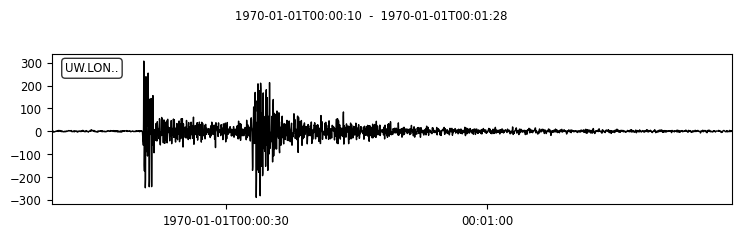

number of windows: 39
maximum amp window index: 10
Max Window:


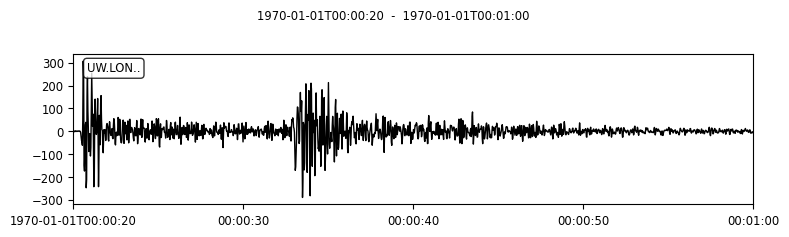

---
lonrpra005 template original stream:


/home/jupyter_share/miniconda3/envs/seismo/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


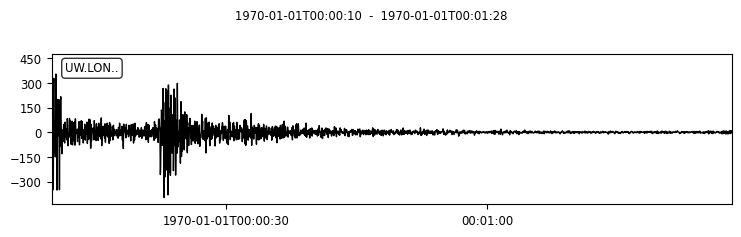

number of windows: 39
maximum amp window index: 0
Max Window:


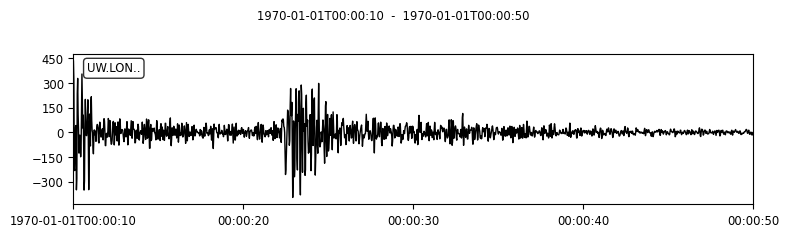

---
lonbhzrpra007 template original stream:


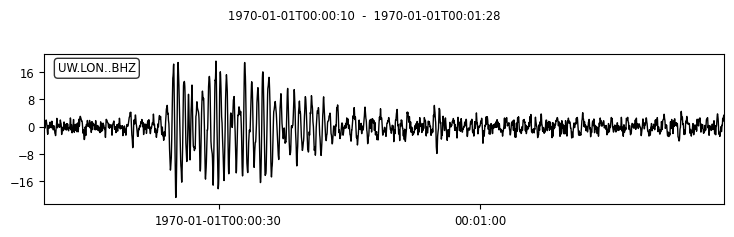

number of windows: 39
maximum amp window index: 9
Max Window:


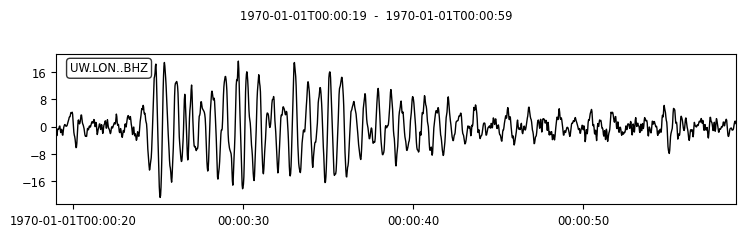

---
lonbhzrpra008 template original stream:


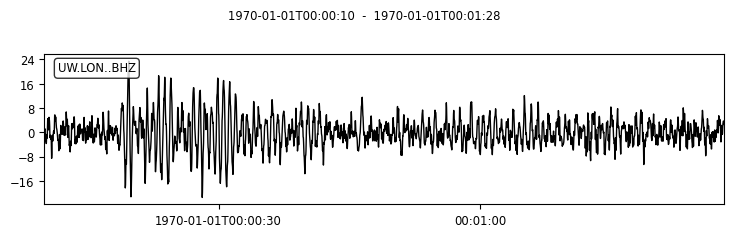

number of windows: 39
maximum amp window index: 8
Max Window:


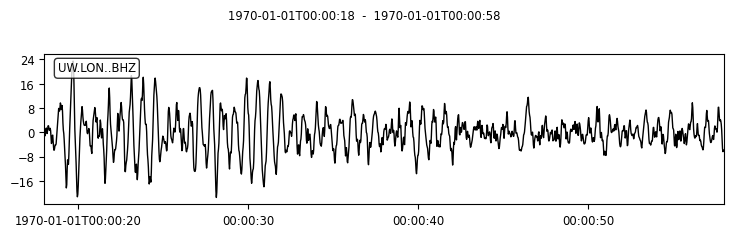

---
lonbhzrpra013 template original stream:


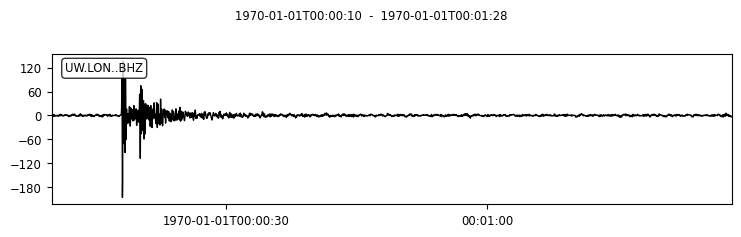

number of windows: 39
maximum amp window index: 8
Max Window:


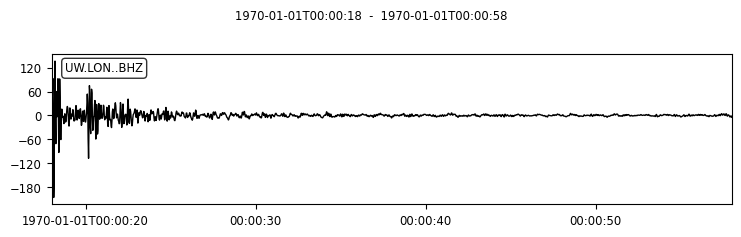

---
lonrpra016 template original stream:


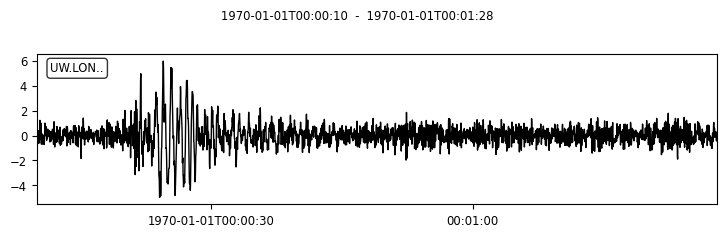

number of windows: 39
maximum amp window index: 8
Max Window:


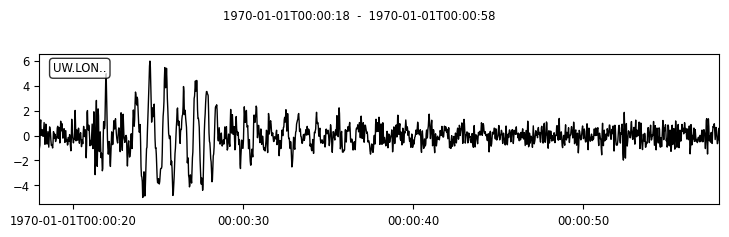

---
lonrpra018 template original stream:


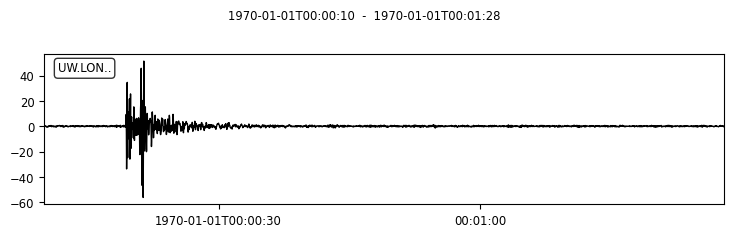

number of windows: 39
maximum amp window index: 8
Max Window:


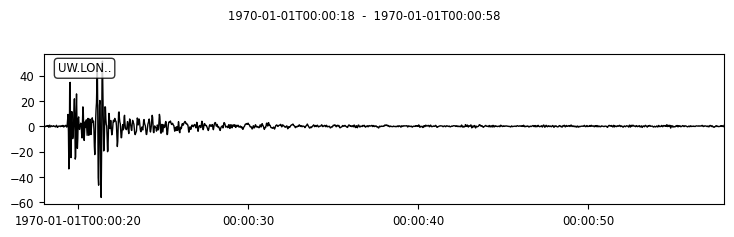

---
lonbhzrpra020 template original stream:


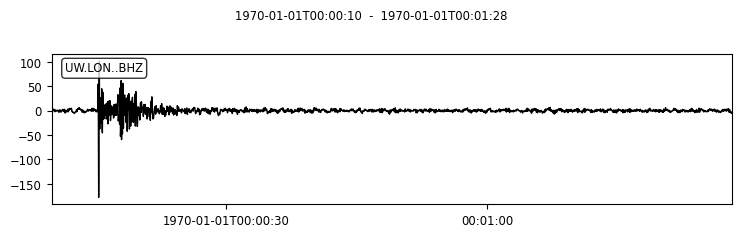

number of windows: 39
maximum amp window index: 0
Max Window:


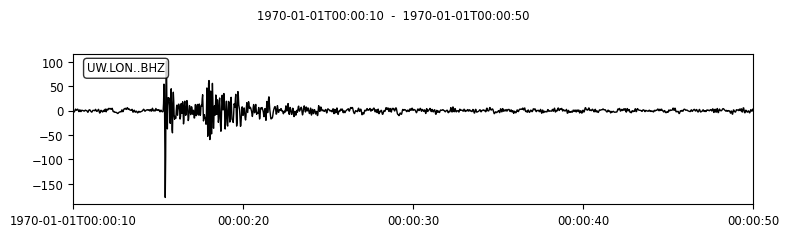

---
lonbhzrpra021 template original stream:


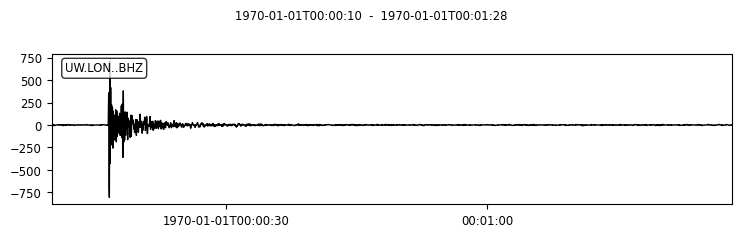

number of windows: 39
maximum amp window index: 6
Max Window:


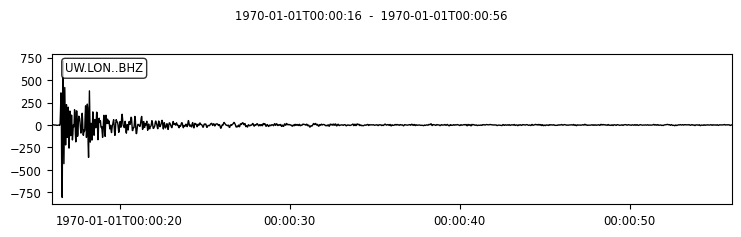

---
lonbhzrpra025 template original stream:


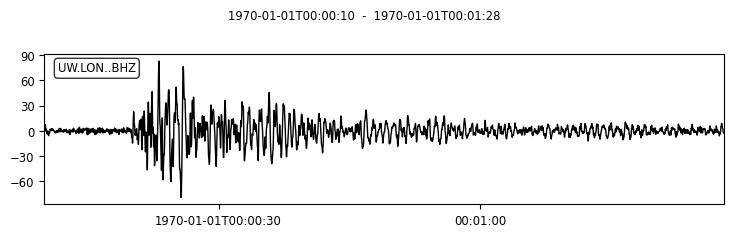

number of windows: 39
maximum amp window index: 10
Max Window:


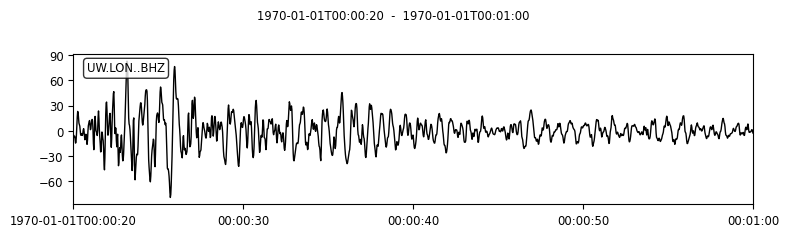

---
lonbhzrpra031 template original stream:


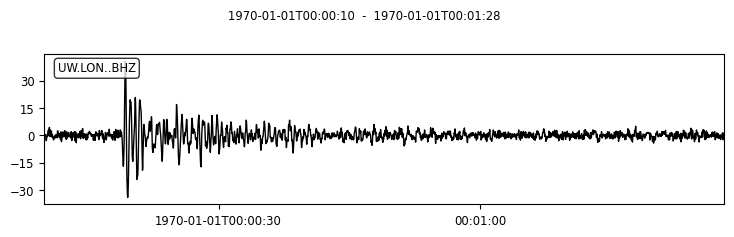

number of windows: 39
maximum amp window index: 8
Max Window:


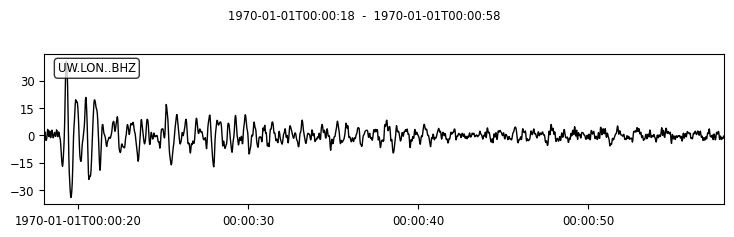

---
lonbhzrpra034 template original stream:


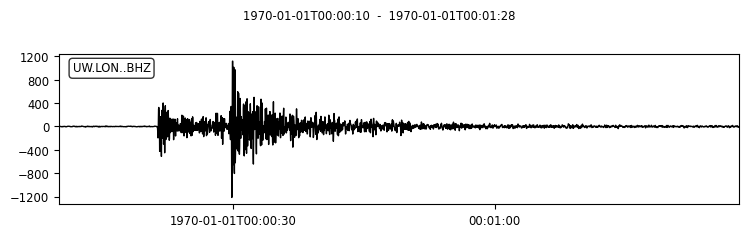

number of windows: 39
maximum amp window index: 11
Max Window:


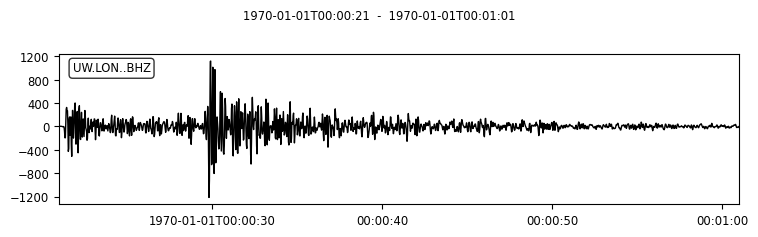

---
lonbhzrpra035 template original stream:


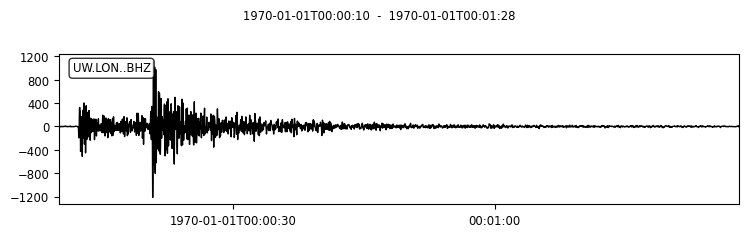

number of windows: 39
maximum amp window index: 2
Max Window:


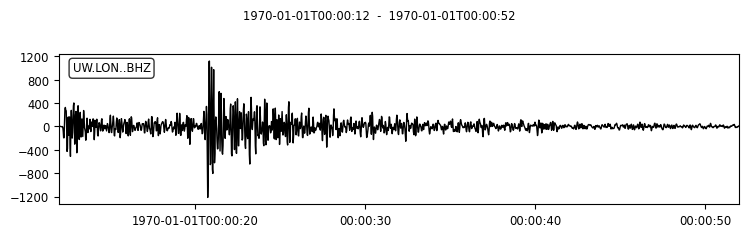

---
lonrpra040 template original stream:


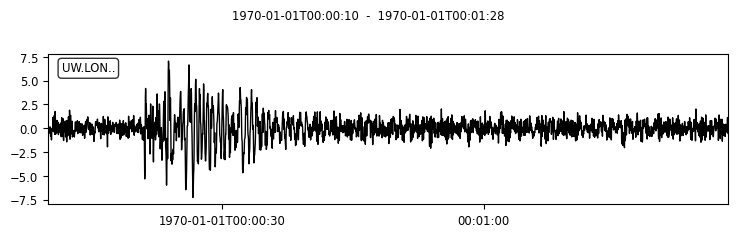

number of windows: 39
maximum amp window index: 11
Max Window:


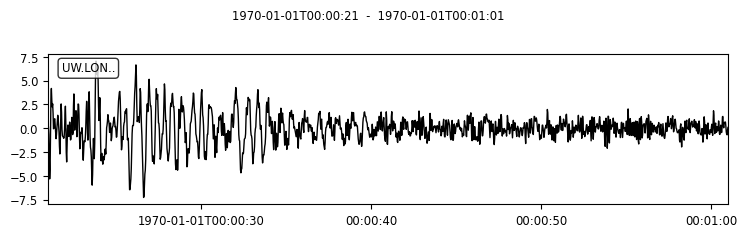

---
lonbhzrpra043 template original stream:


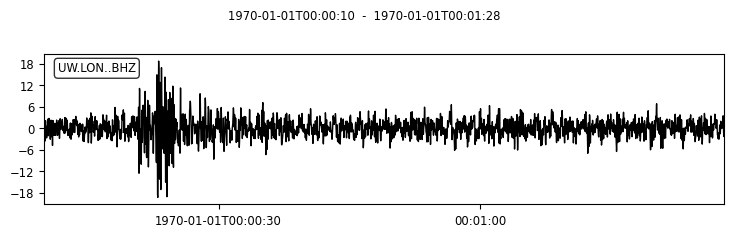

number of windows: 39
maximum amp window index: 10
Max Window:


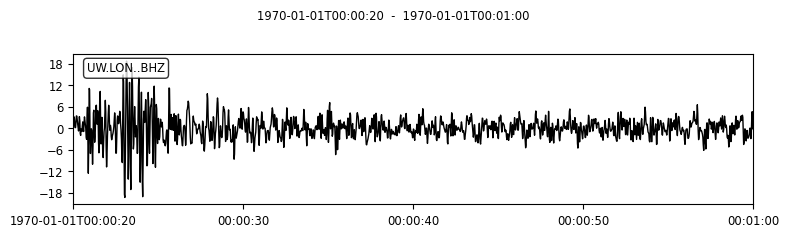

---
lonbhzrpra044 template original stream:


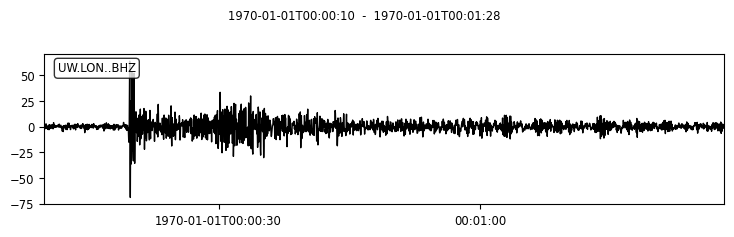

number of windows: 39
maximum amp window index: 9
Max Window:


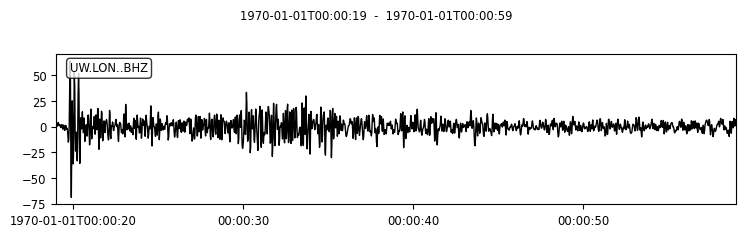

---
lonbhzrpra047 template original stream:


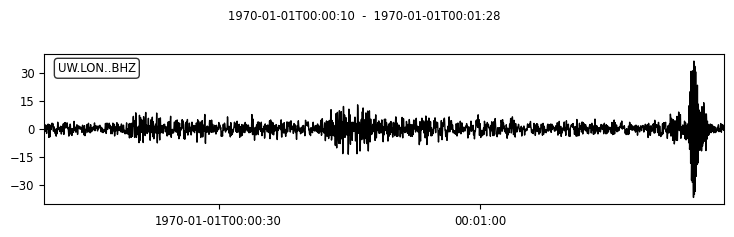

number of windows: 39
maximum amp window index: 36
Max Window:


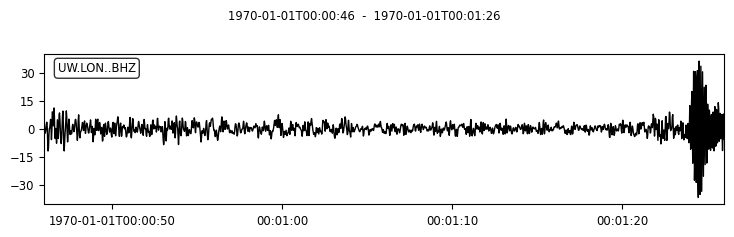

---
lonbhzrpra048 template original stream:


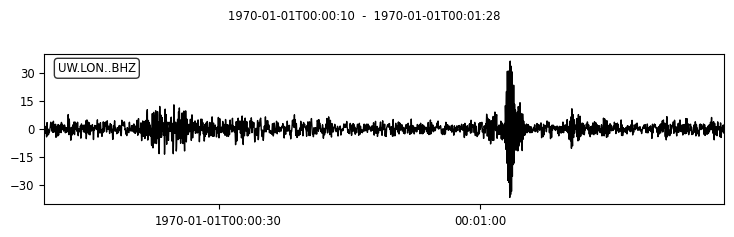

number of windows: 39
maximum amp window index: 15
Max Window:


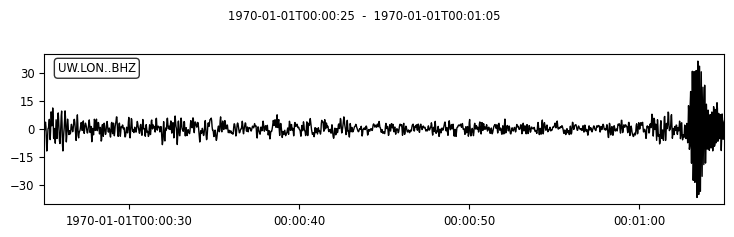

---
lonbhzrpra049 template original stream:


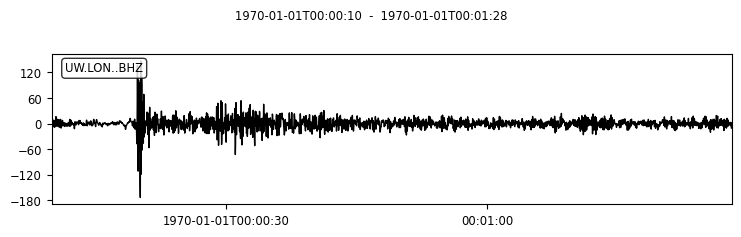

number of windows: 39
maximum amp window index: 9
Max Window:


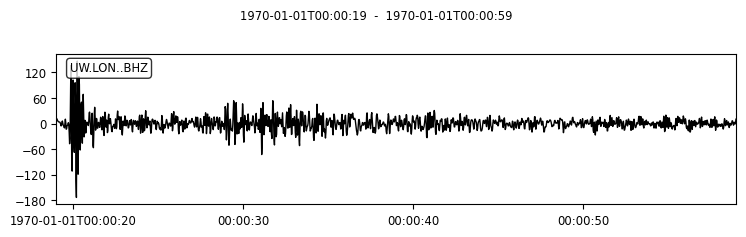

---
lonhhzrpra050 template original stream:


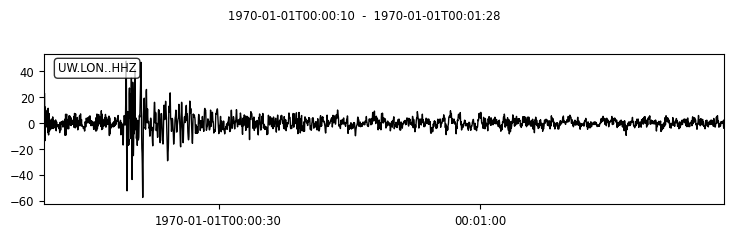

number of windows: 39
maximum amp window index: 0
Max Window:


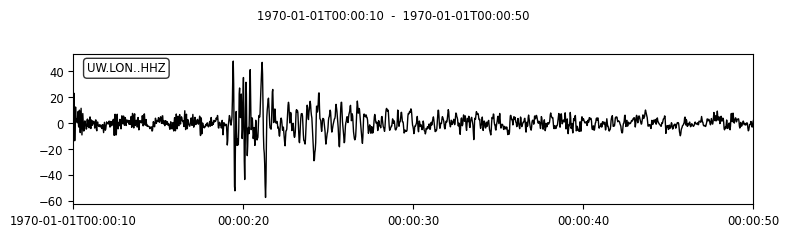

---
lonbhzrpra061 template original stream:


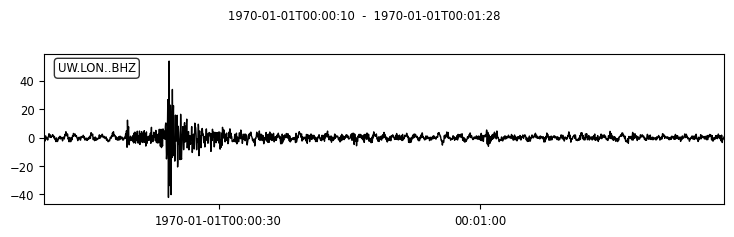

number of windows: 39
maximum amp window index: 9
Max Window:


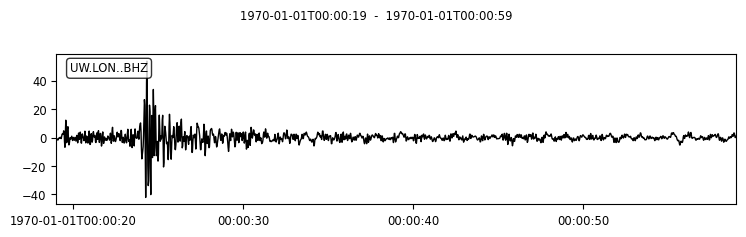

---
lonrpra063 template original stream:


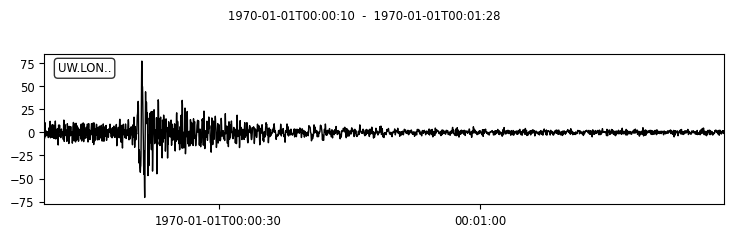

number of windows: 39
maximum amp window index: 0
Max Window:


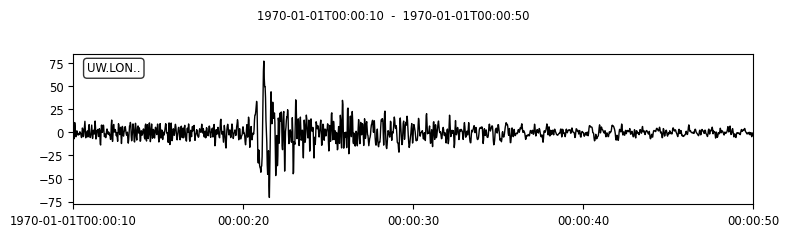

---
lonbhzrpra071 template original stream:


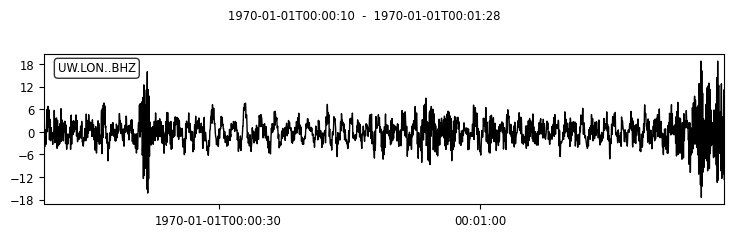

number of windows: 39
maximum amp window index: 38
Max Window:


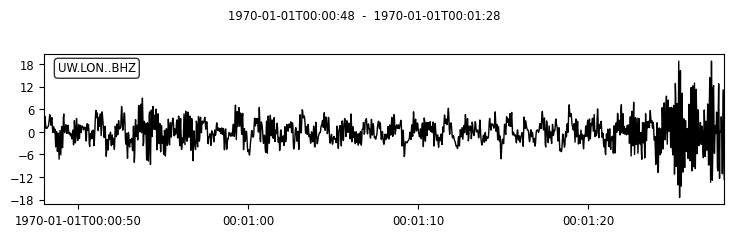

---
lonbhzrpra078 template original stream:


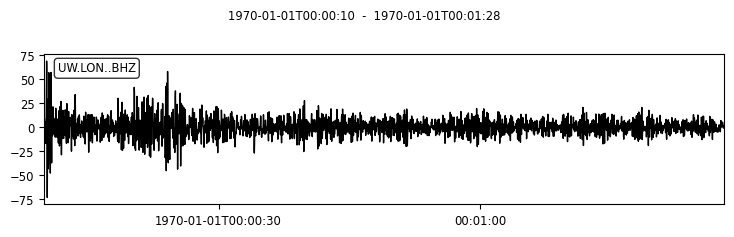

number of windows: 39
maximum amp window index: 0
Max Window:


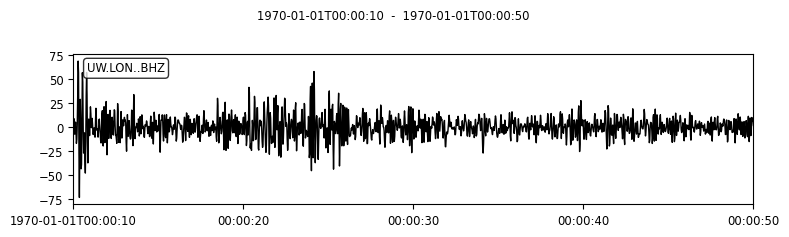

---
lonbhzrpra082 template original stream:


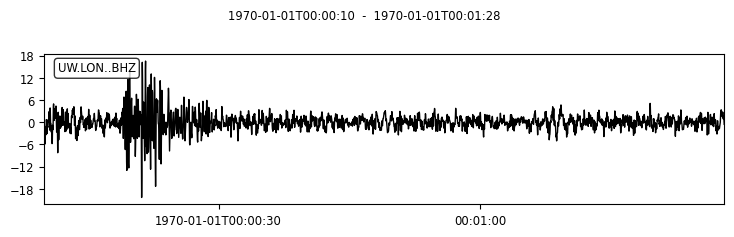

number of windows: 39
maximum amp window index: 0
Max Window:


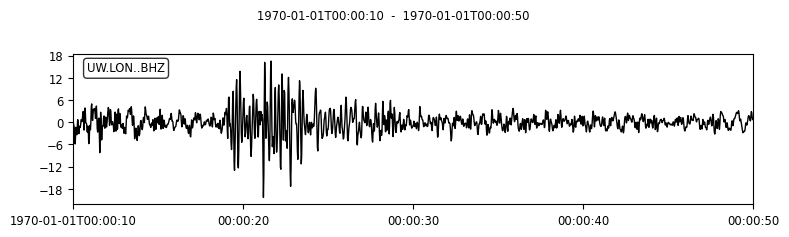

---
lonrpra084 template original stream:


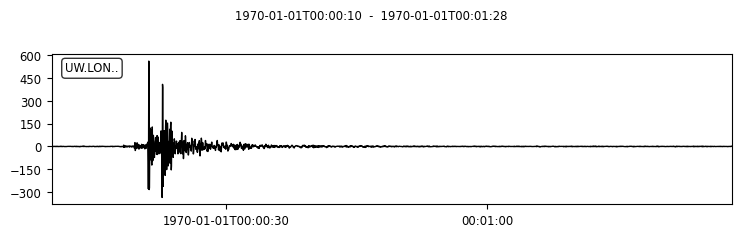

number of windows: 39
maximum amp window index: 8
Max Window:


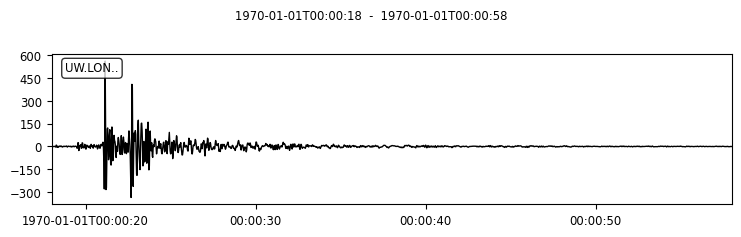

---
lonrpra092 template original stream:


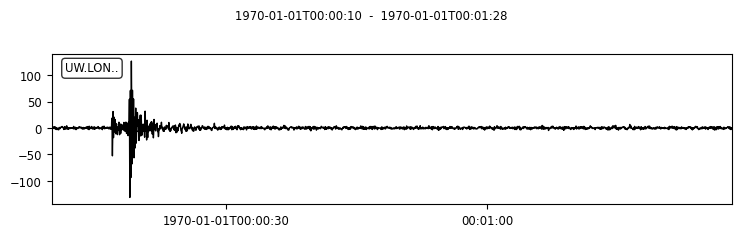

number of windows: 39
maximum amp window index: 6
Max Window:


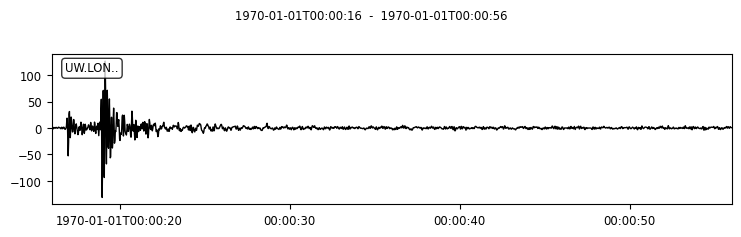

---
lonbhzrpra094 template original stream:


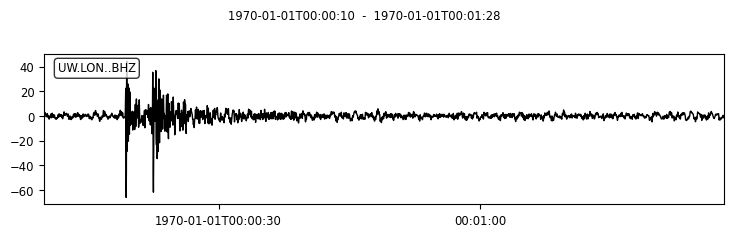

number of windows: 39
maximum amp window index: 2
Max Window:


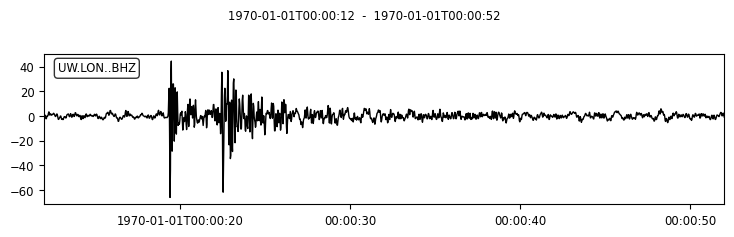

---
lonrpra096 template original stream:


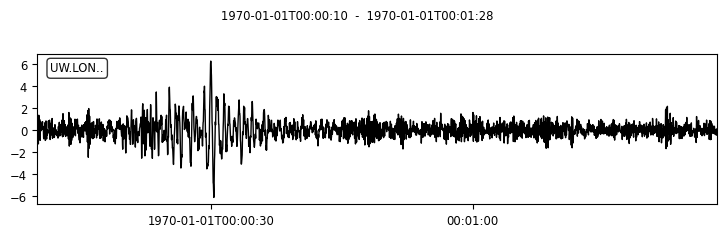

number of windows: 39
maximum amp window index: 0
Max Window:


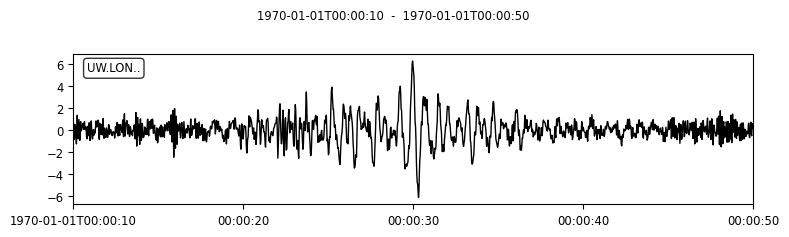

---
lonrpra098 template original stream:


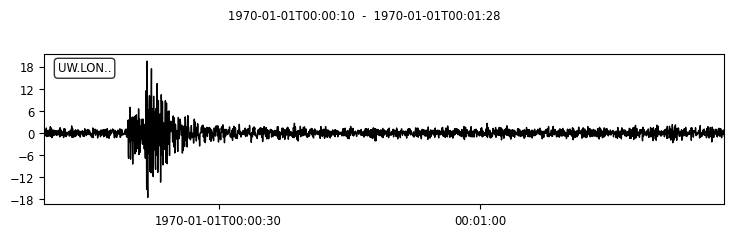

number of windows: 39
maximum amp window index: 9
Max Window:


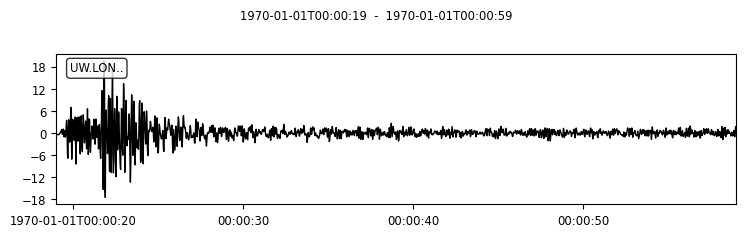

---
lonbhzrpra104 template original stream:


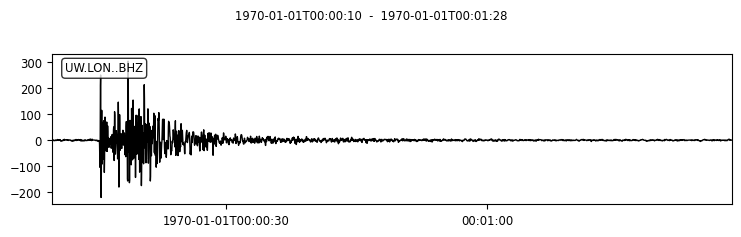

number of windows: 39
maximum amp window index: 5
Max Window:


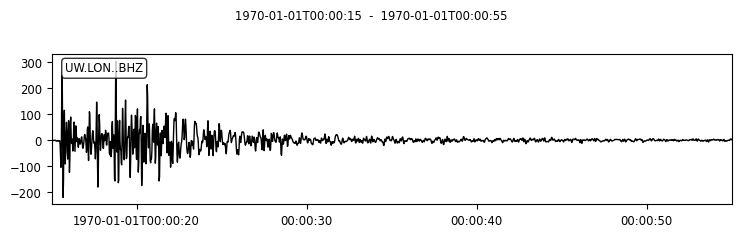

---
lonbhzrpra107 template original stream:


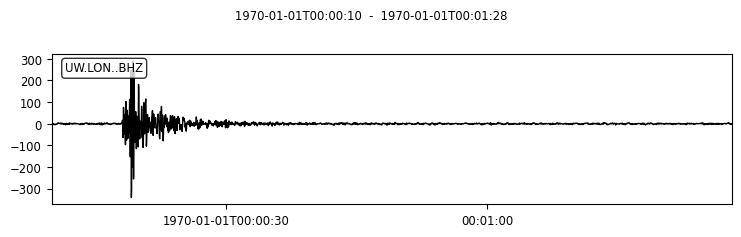

number of windows: 39
maximum amp window index: 5
Max Window:


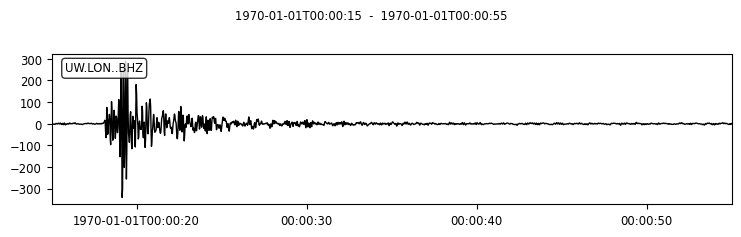

---
lonbhzrpra108 template original stream:


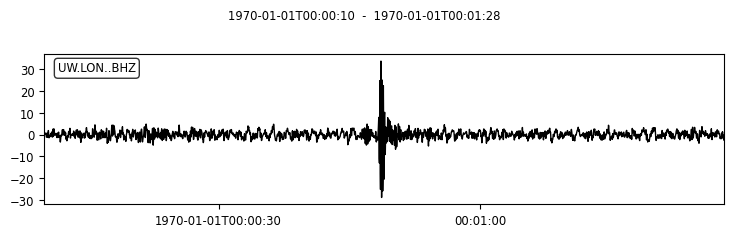

number of windows: 39
maximum amp window index: 7
Max Window:


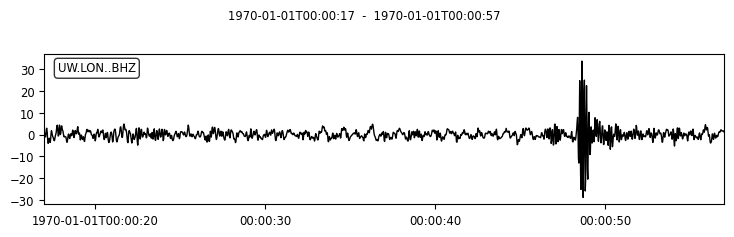

---
lonbhzrpra109 template original stream:


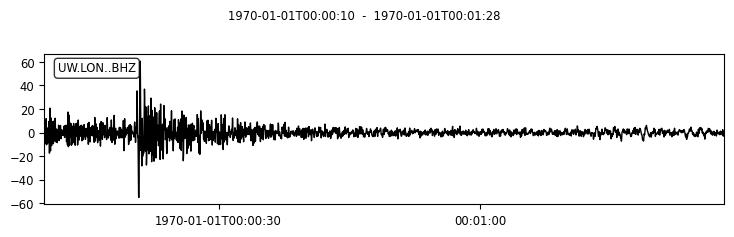

number of windows: 39
maximum amp window index: 0
Max Window:


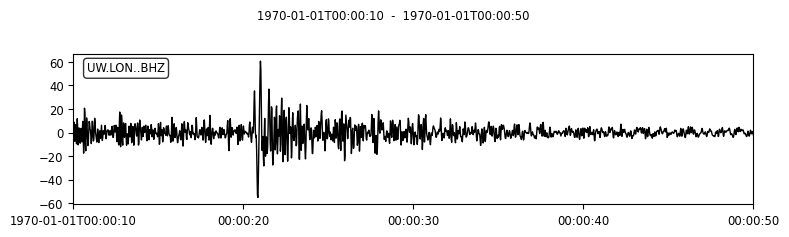

---
lonbhzrpra110 template original stream:


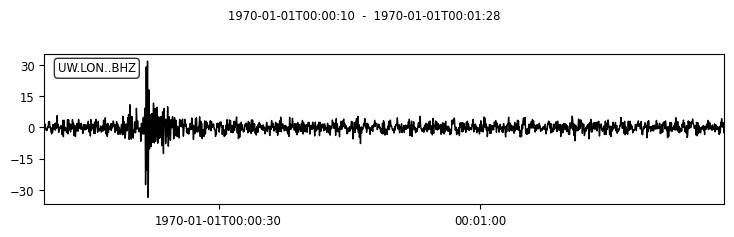

number of windows: 39
maximum amp window index: 8
Max Window:


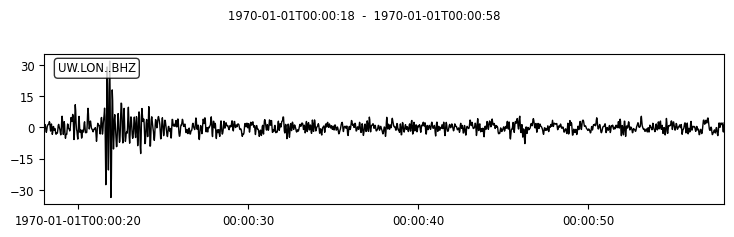

---
lonbhzrpra111 template original stream:


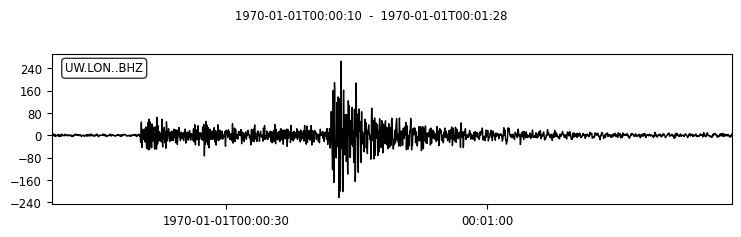

number of windows: 39
maximum amp window index: 10
Max Window:


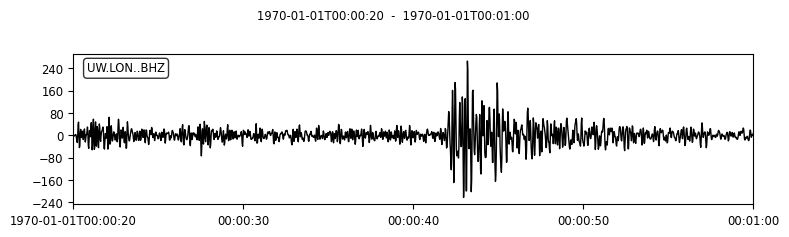

---
lonbhzrpra112 template original stream:


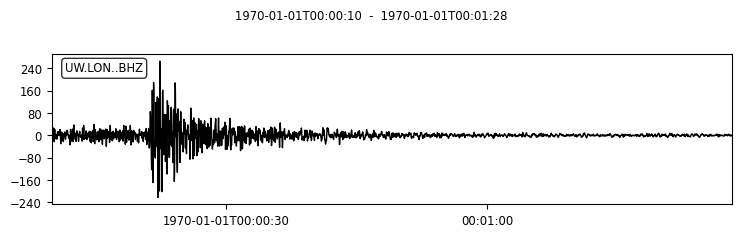

number of windows: 39
maximum amp window index: 0
Max Window:


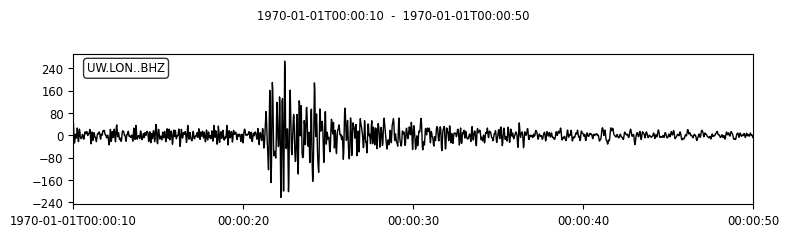

---
lonbhzrpra114 template original stream:


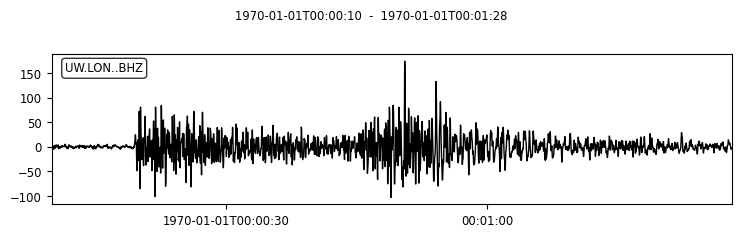

number of windows: 39
maximum amp window index: 10
Max Window:


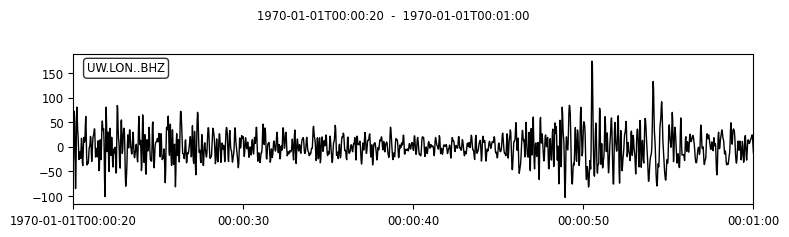

---
lonbhzrpra117 template original stream:


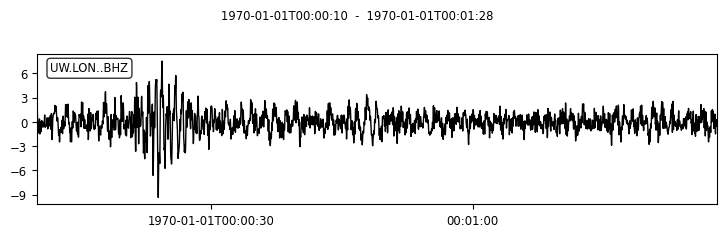

number of windows: 39
maximum amp window index: 2
Max Window:


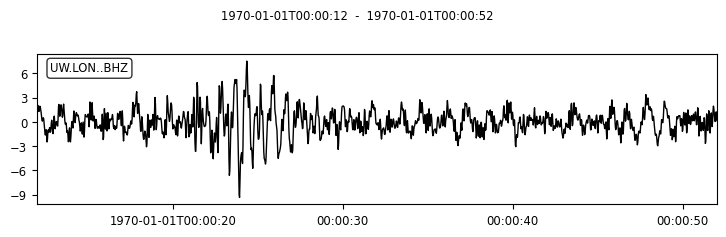

---
lonbhzrpra118 template original stream:


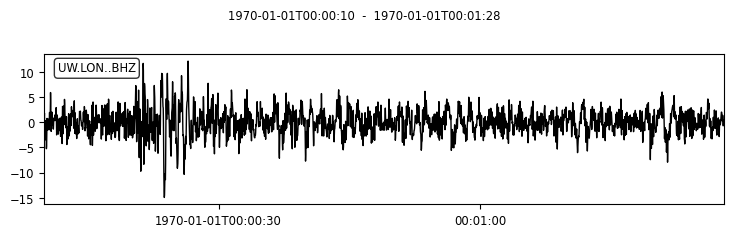

number of windows: 39
maximum amp window index: 9
Max Window:


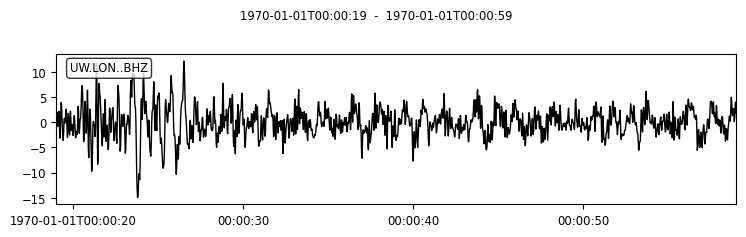

---
lonbhzrpra120 template original stream:


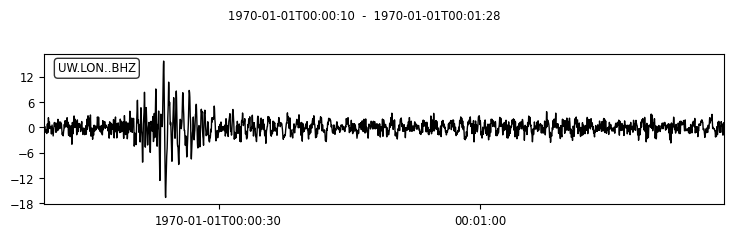

number of windows: 39
maximum amp window index: 9
Max Window:


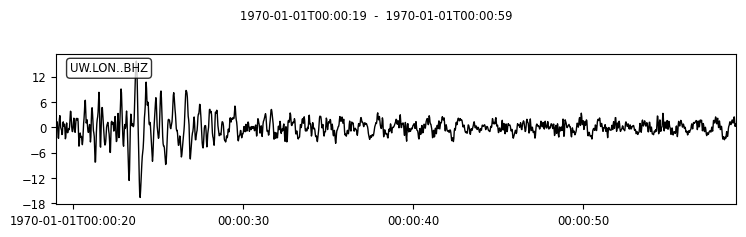

---
lonrpra122 template original stream:


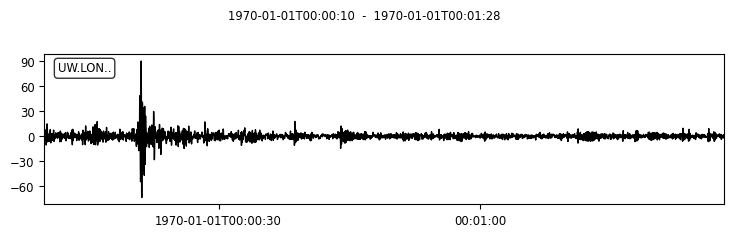

number of windows: 39
maximum amp window index: 0
Max Window:


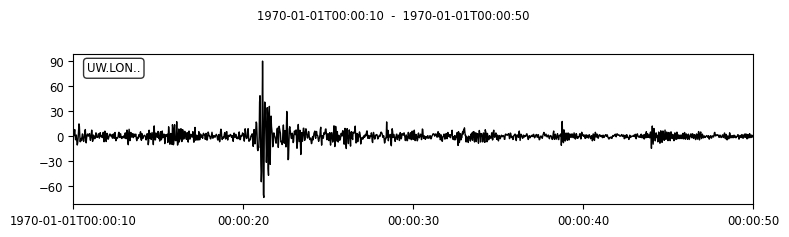

---
lonbhzrpra128 template original stream:


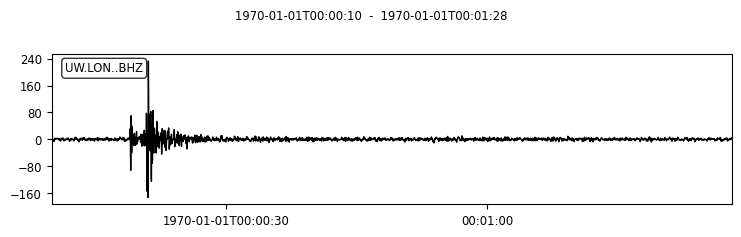

number of windows: 39
maximum amp window index: 8
Max Window:


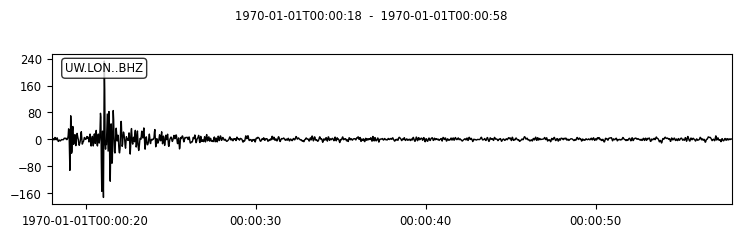

---
lonrpra130 template original stream:


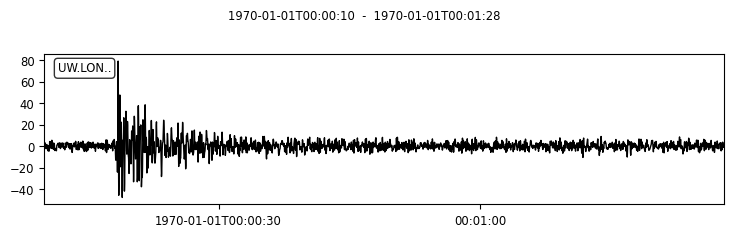

number of windows: 39
maximum amp window index: 8
Max Window:


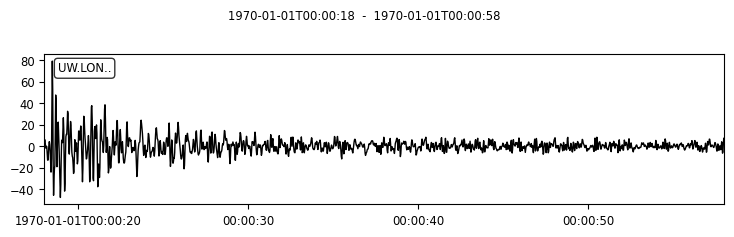

---
lonbhzrpra131 template original stream:


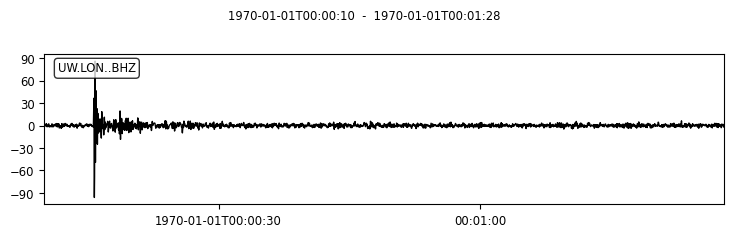

number of windows: 39
maximum amp window index: 4
Max Window:


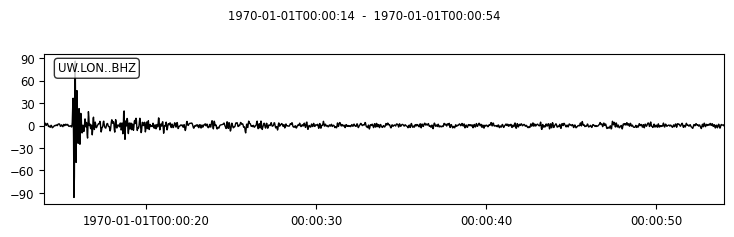

---
lonbhzrpra136 template original stream:


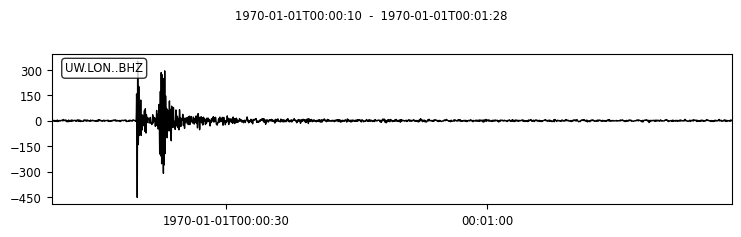

number of windows: 39
maximum amp window index: 7
Max Window:


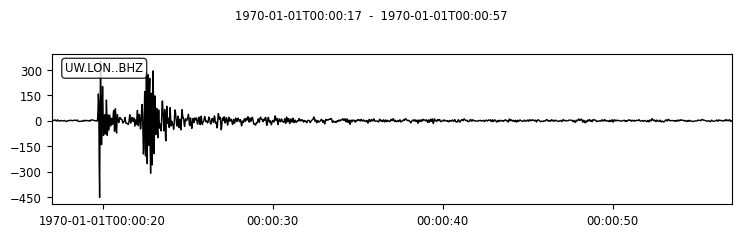

---
lonrpra137 template original stream:


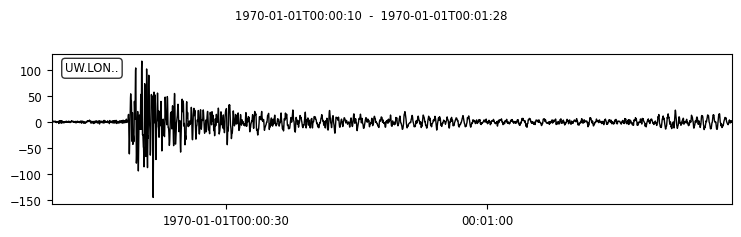

number of windows: 39
maximum amp window index: 8
Max Window:


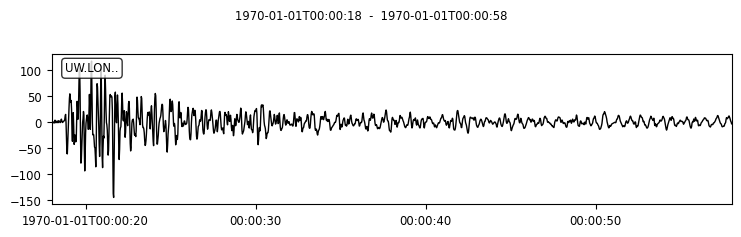

---
lonrpra140 template original stream:


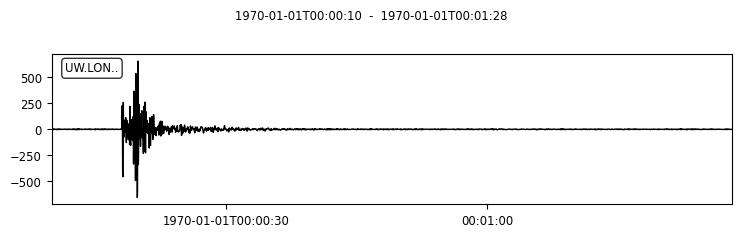

number of windows: 39
maximum amp window index: 3
Max Window:


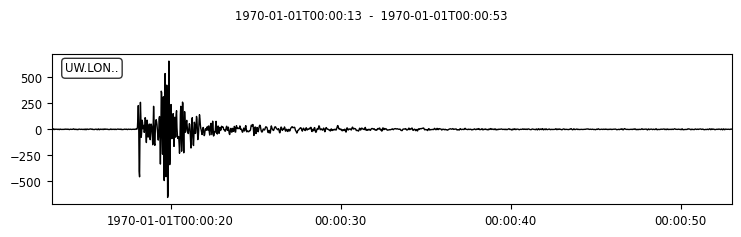

---
lonhhzrpra156 template original stream:


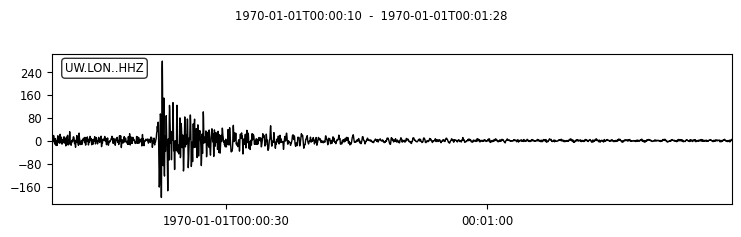

number of windows: 39
maximum amp window index: 0
Max Window:


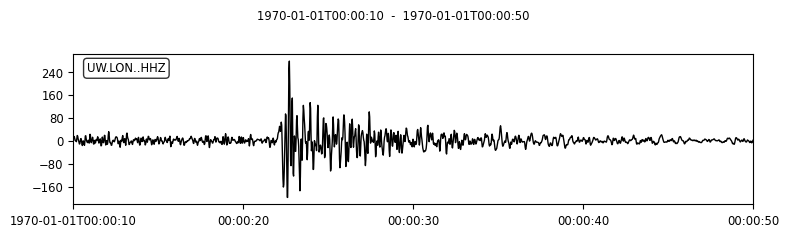

---
lonhhzrpra157 template original stream:


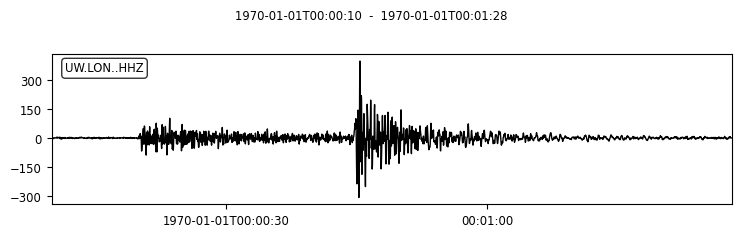

number of windows: 39
maximum amp window index: 10
Max Window:


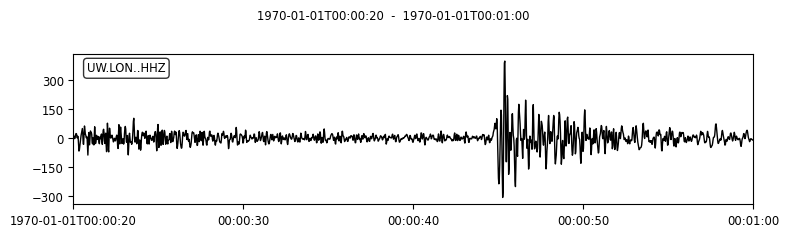

---
lonhhzrpra159 template original stream:


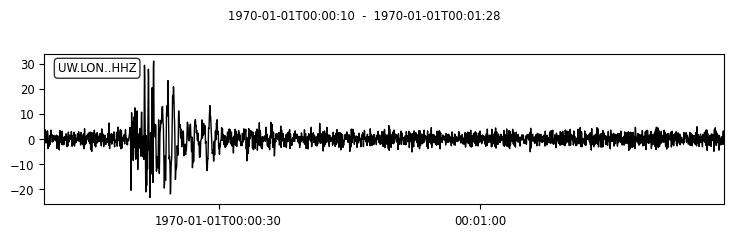

number of windows: 39
maximum amp window index: 5
Max Window:


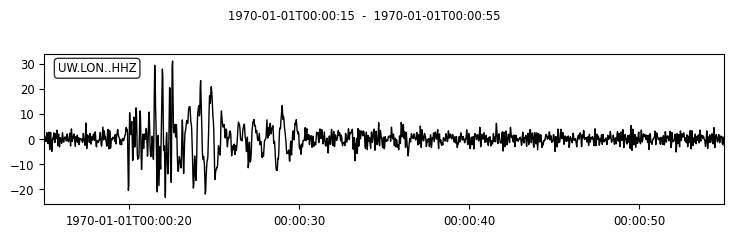

---
lonhhzrpra161 template original stream:


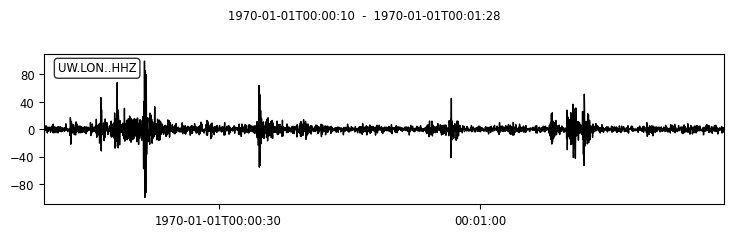

number of windows: 39
maximum amp window index: 0
Max Window:


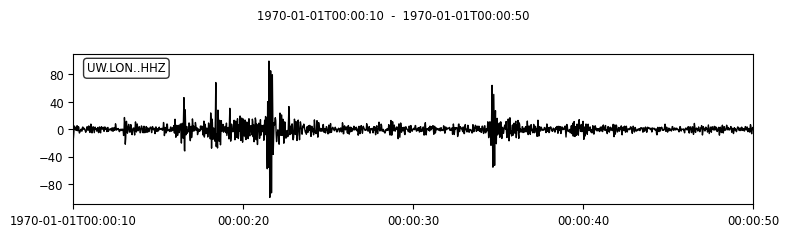

---
lonhhzrpra170 template original stream:


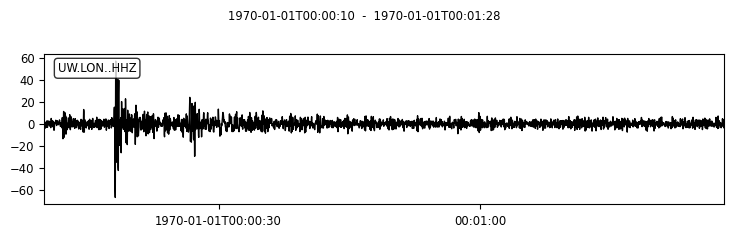

number of windows: 39
maximum amp window index: 2
Max Window:


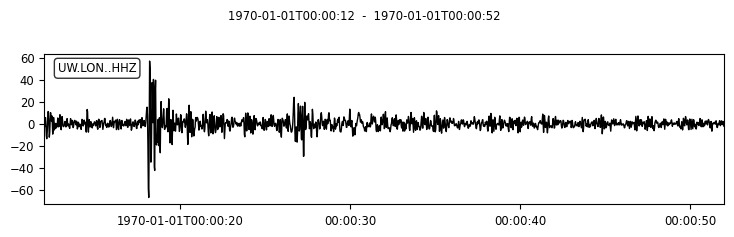

---
lonhhzrpra171 template original stream:


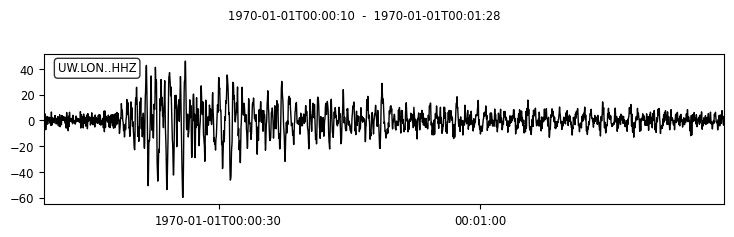

number of windows: 39
maximum amp window index: 8
Max Window:


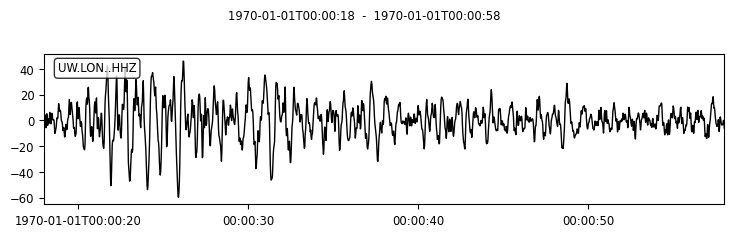

---
lonhhzrpra172 template original stream:


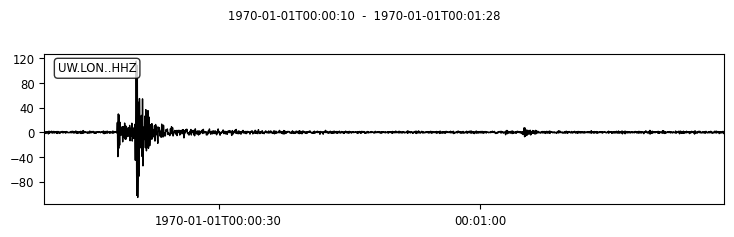

number of windows: 39
maximum amp window index: 0
Max Window:


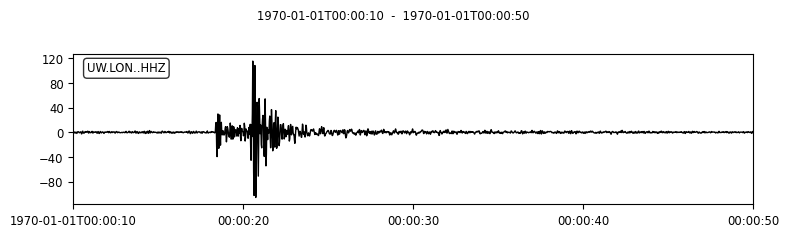

---
lonhhzrpra174 template original stream:


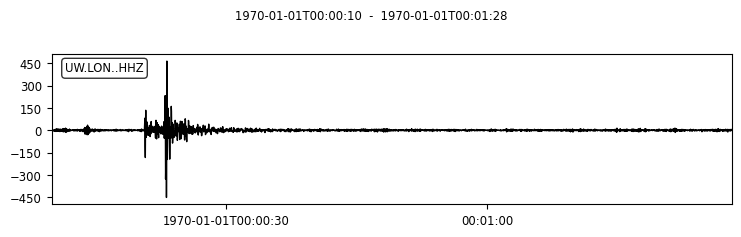

number of windows: 39
maximum amp window index: 0
Max Window:


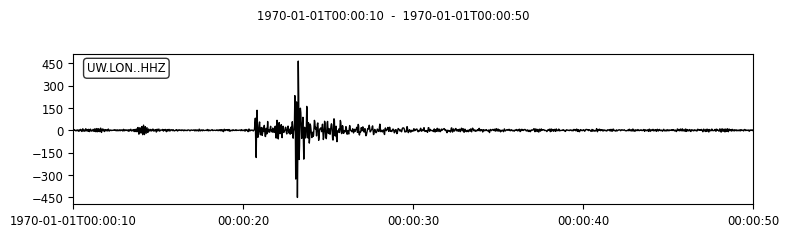

---
lonhhzrpra179 template original stream:


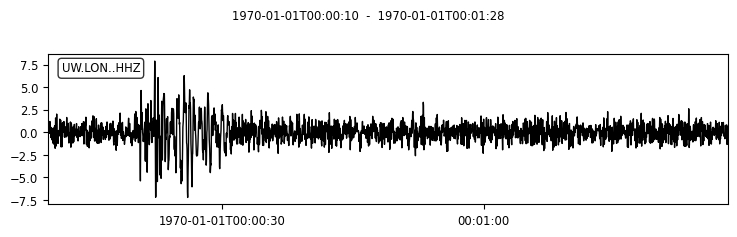

number of windows: 39
maximum amp window index: 4
Max Window:


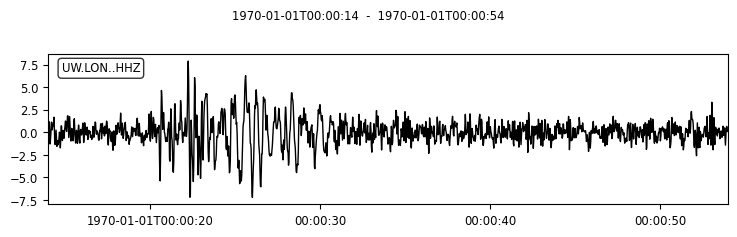

---
lonhhzrpra185 template original stream:


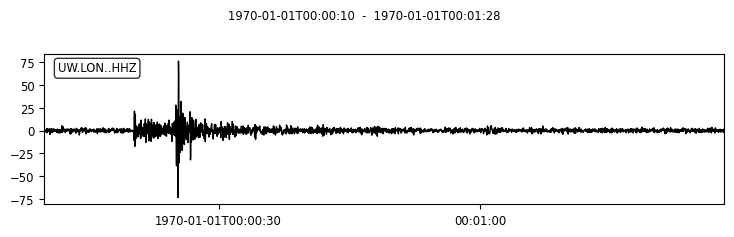

number of windows: 39
maximum amp window index: 9
Max Window:


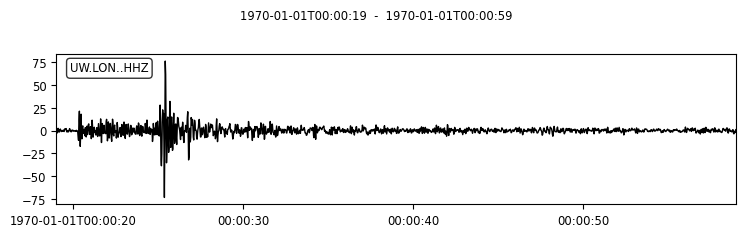

---
lonhhzrpra186 template original stream:


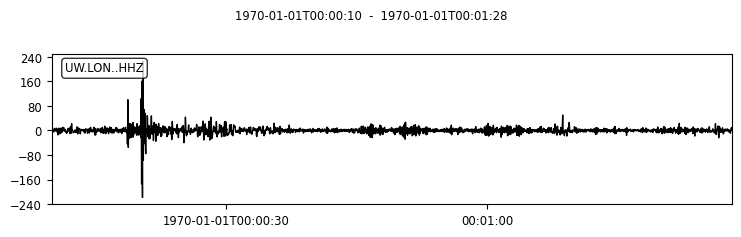

number of windows: 39
maximum amp window index: 3
Max Window:


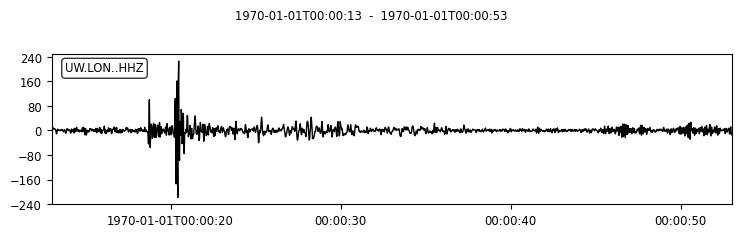

---
lonhhzrpra189 template original stream:


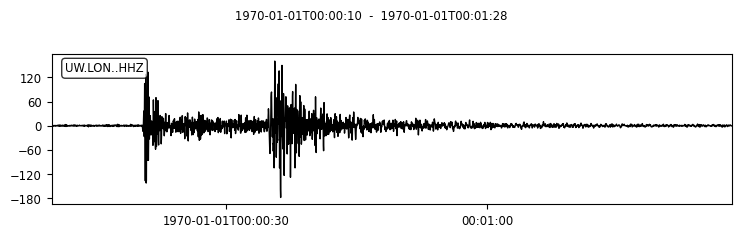

number of windows: 39
maximum amp window index: 10
Max Window:


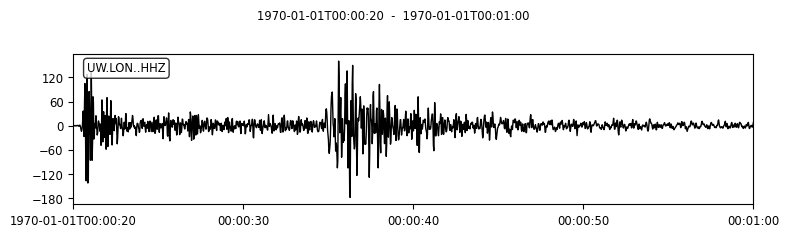

---
lonhhzrpra191 template original stream:


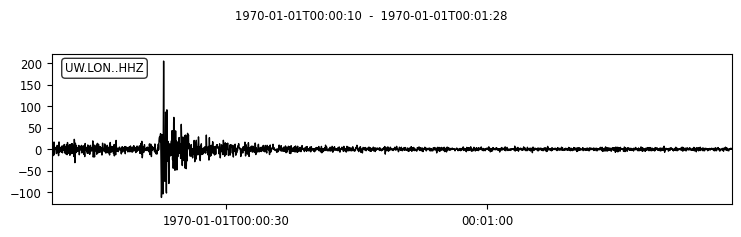

number of windows: 39
maximum amp window index: 0
Max Window:


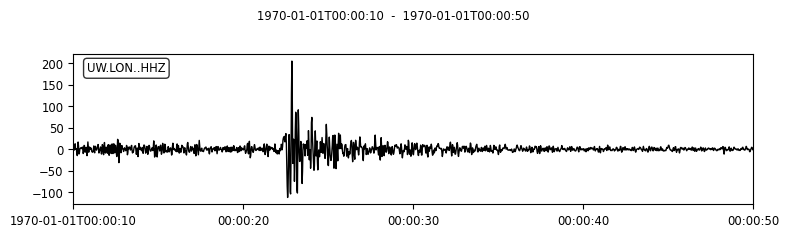

---
lonhhzrpra192 template original stream:


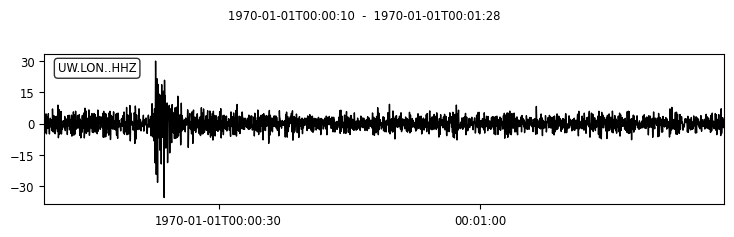

number of windows: 39
maximum amp window index: 1
Max Window:


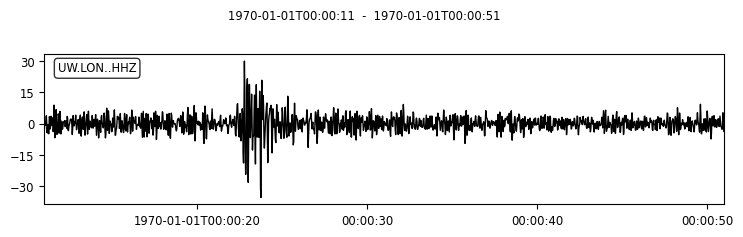

---
lonhhzrpra196 template original stream:


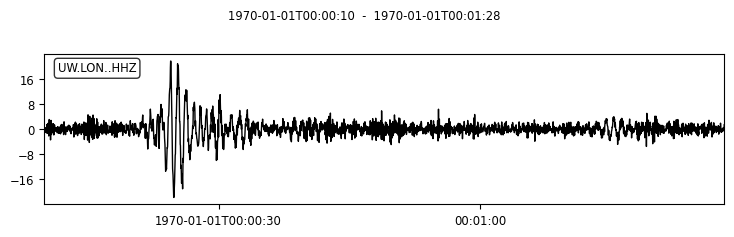

number of windows: 39
maximum amp window index: 3
Max Window:


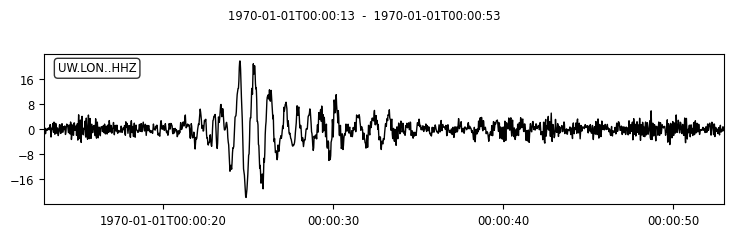

---
lonhhzrpra204 template original stream:


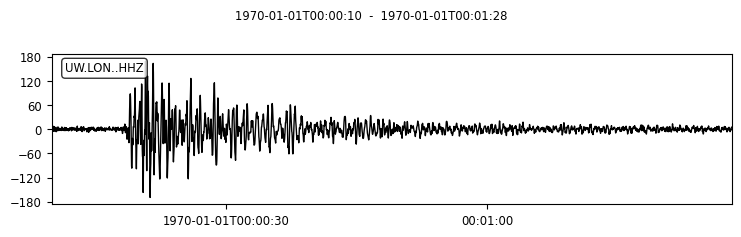

number of windows: 39
maximum amp window index: 8
Max Window:


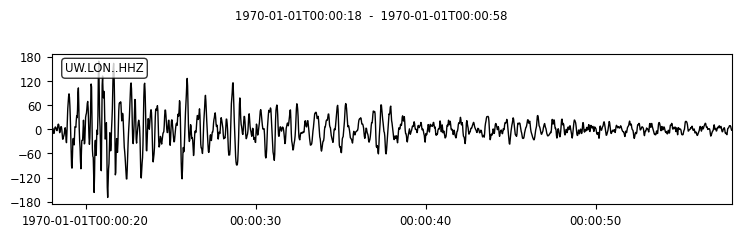

---
lonhhzrpra205 template original stream:


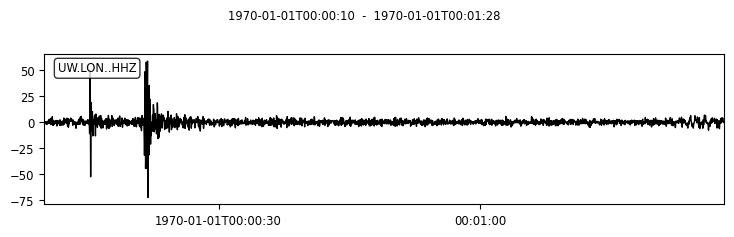

number of windows: 39
maximum amp window index: 1
Max Window:


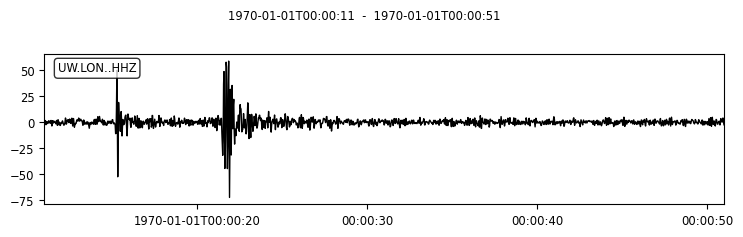

---
lonhhzrpra208 template original stream:


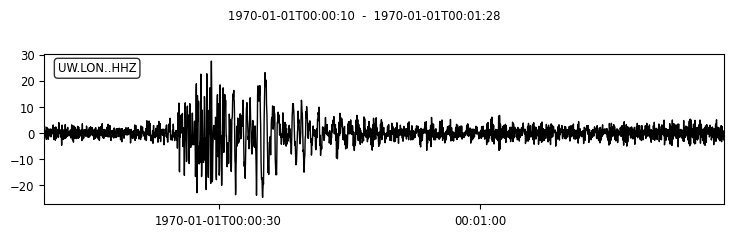

number of windows: 39
maximum amp window index: 14
Max Window:


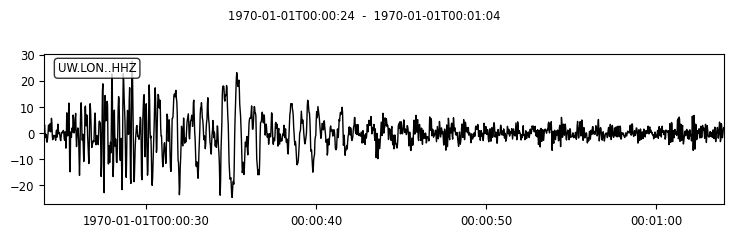

---
lonhhzrpra210 template original stream:


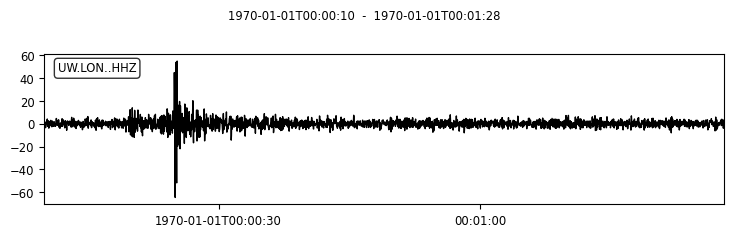

number of windows: 39
maximum amp window index: 9
Max Window:


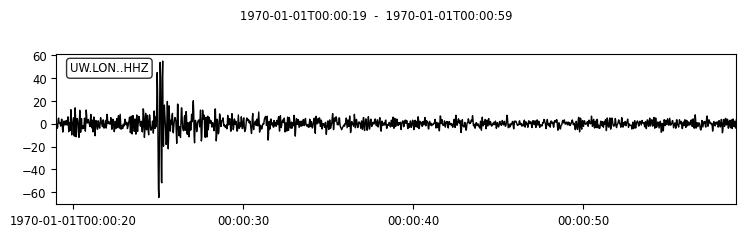

---
lonhhzrpra211 template original stream:


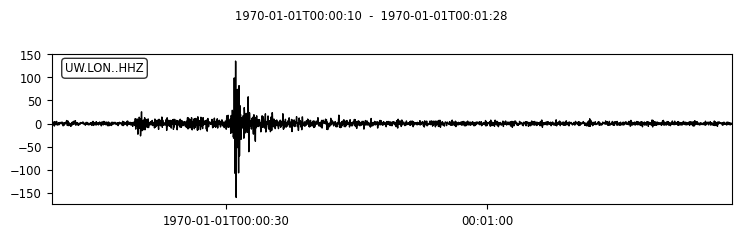

number of windows: 39
maximum amp window index: 8
Max Window:


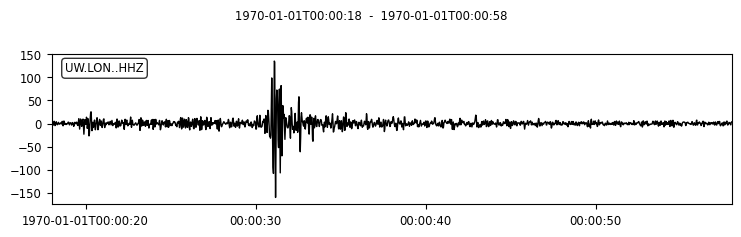

---
lonhhzrpra216 template original stream:


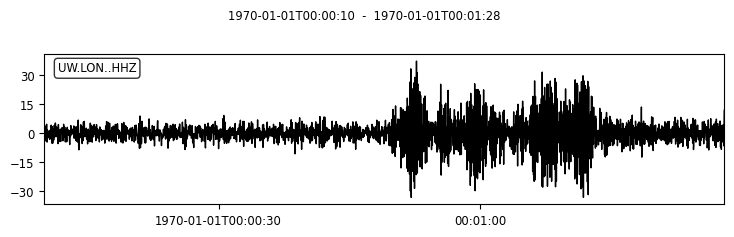

number of windows: 39
maximum amp window index: 38
Max Window:


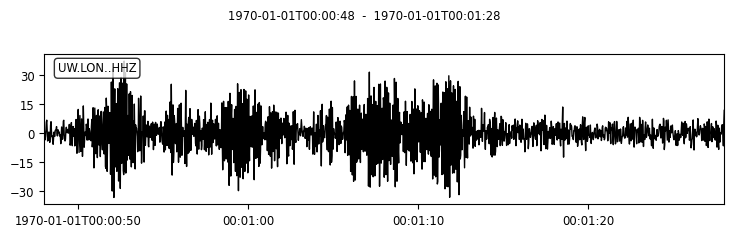

---
lonhhzrpra222 template original stream:


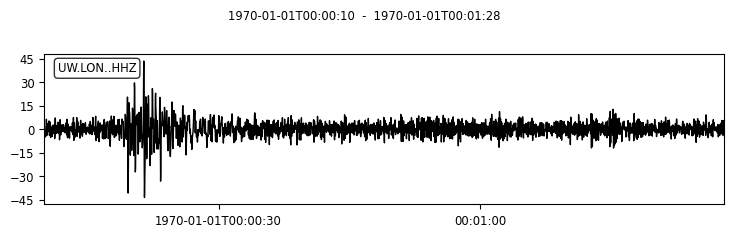

number of windows: 39
maximum amp window index: 7
Max Window:


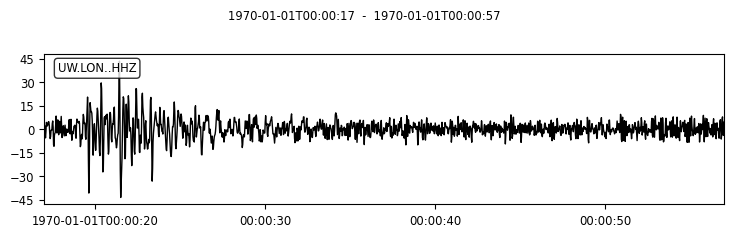

---
lonhhzrpra223 template original stream:


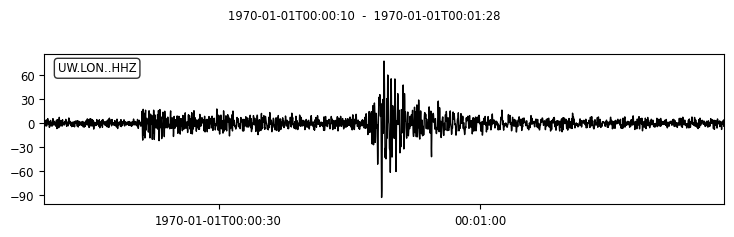

number of windows: 39
maximum amp window index: 11
Max Window:


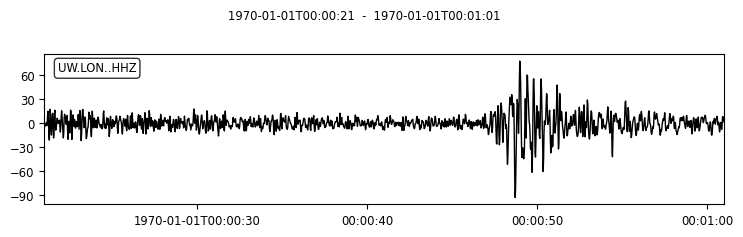

---
lonhhzrpra224 template original stream:


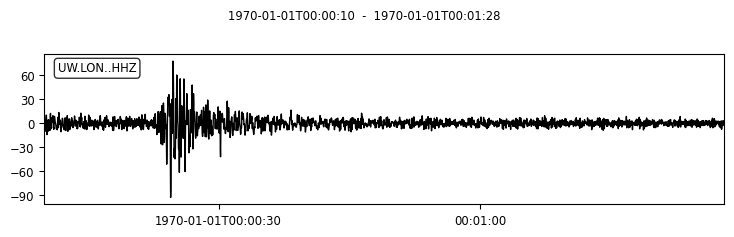

number of windows: 39
maximum amp window index: 0
Max Window:


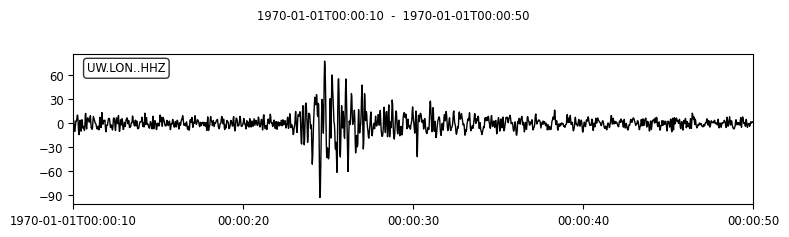

---
lonhhzrpra233 template original stream:


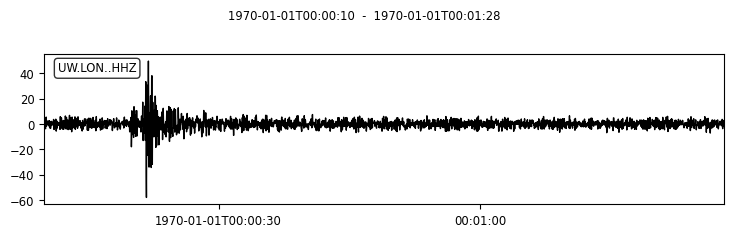

number of windows: 39
maximum amp window index: 2
Max Window:


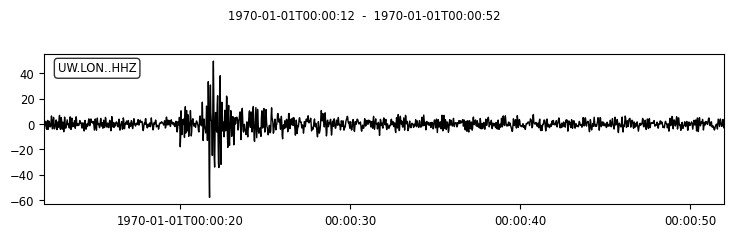

---
lonhhzrpra237 template original stream:


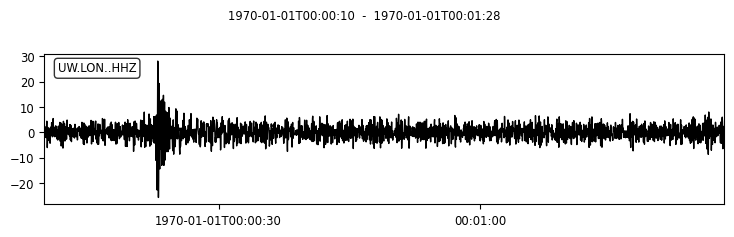

number of windows: 39
maximum amp window index: 6
Max Window:


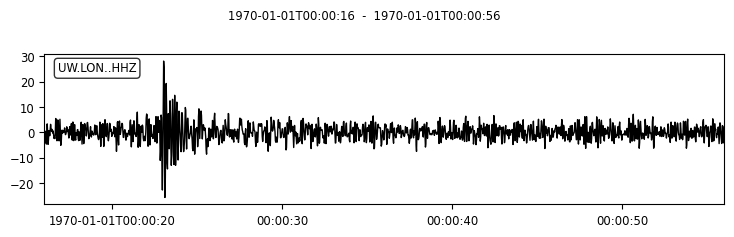

---
lonhhzrpra241 template original stream:


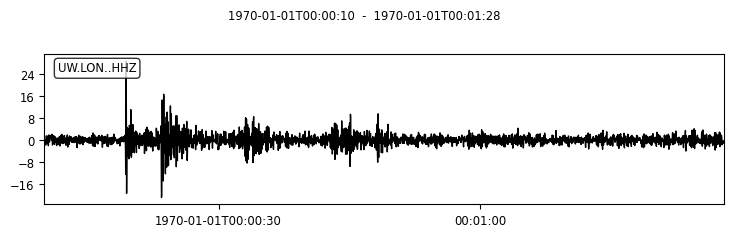

number of windows: 39
maximum amp window index: 9
Max Window:


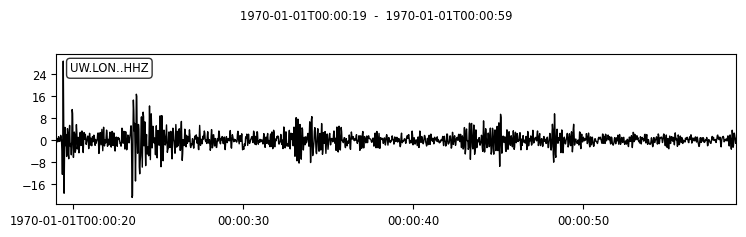

---
lonhhzrpra242 template original stream:


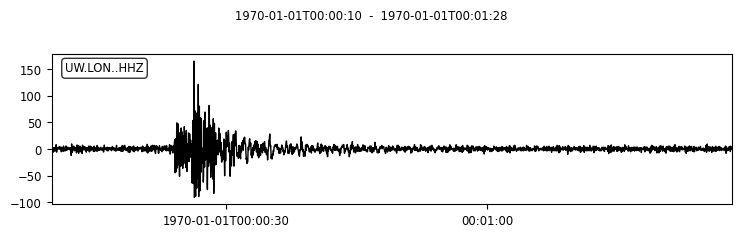

number of windows: 39
maximum amp window index: 8
Max Window:


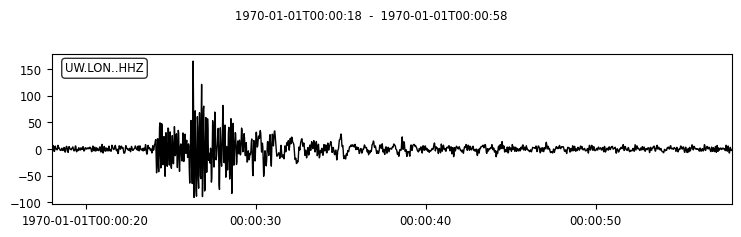

---
lonhhzrpra244 template original stream:


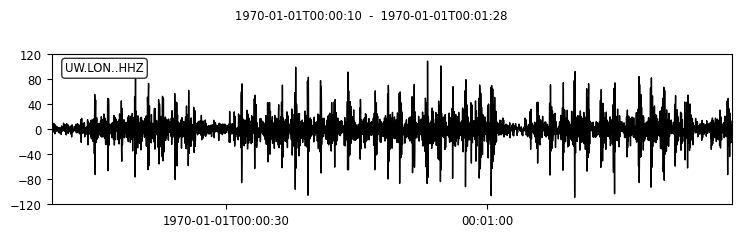

number of windows: 39
maximum amp window index: 34
Max Window:


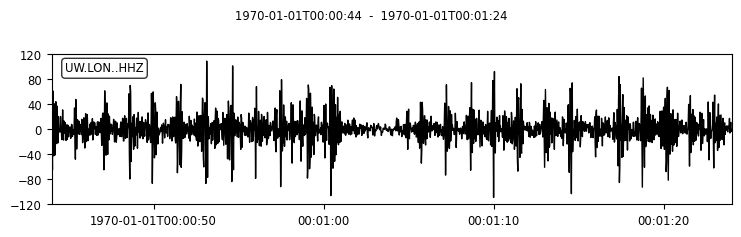

---
lonhhzrpra247 template original stream:


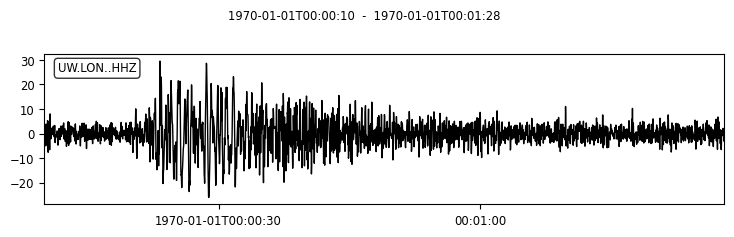

number of windows: 39
maximum amp window index: 12
Max Window:


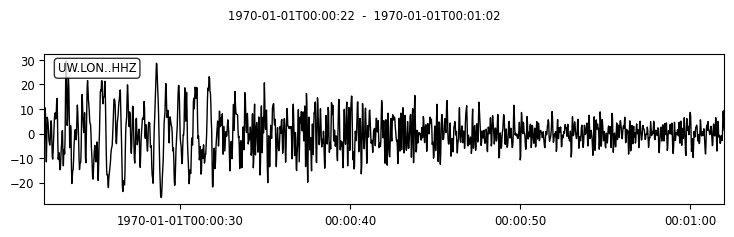

---
lonhhzrpra248 template original stream:


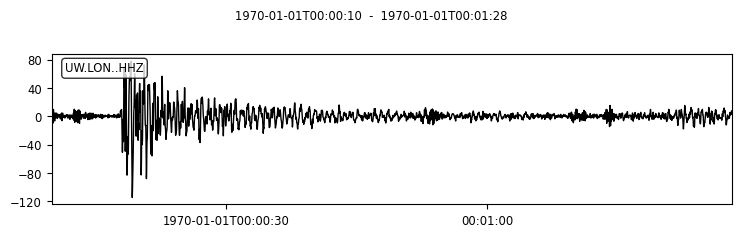

number of windows: 39
maximum amp window index: 7
Max Window:


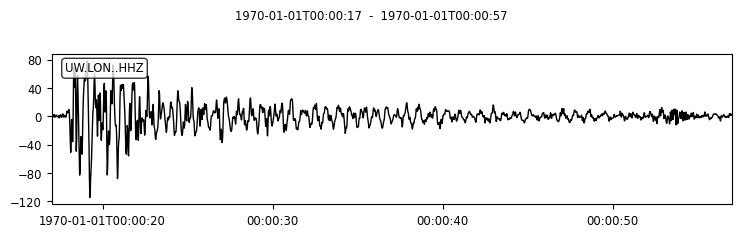

---
lonhhzrpra250 template original stream:


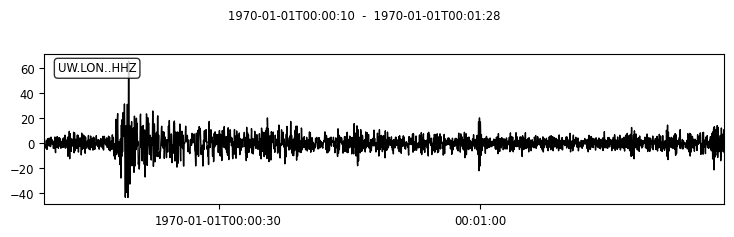

number of windows: 39
maximum amp window index: 7
Max Window:


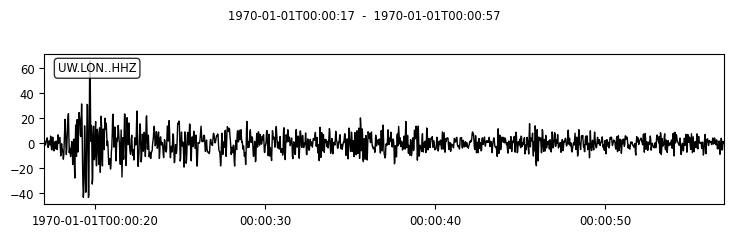

---
lonhhzrpra251 template original stream:


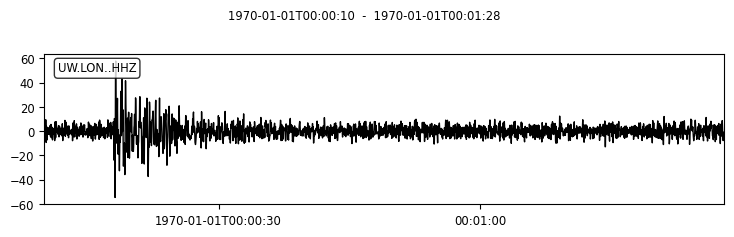

number of windows: 39
maximum amp window index: 5
Max Window:


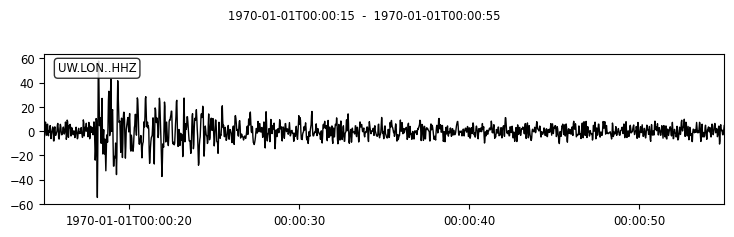

---
lonhhzrpra252 template original stream:


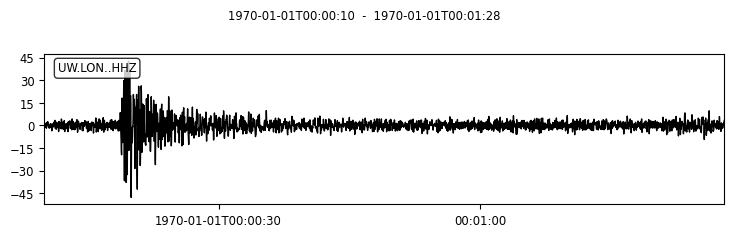

number of windows: 39
maximum amp window index: 4
Max Window:


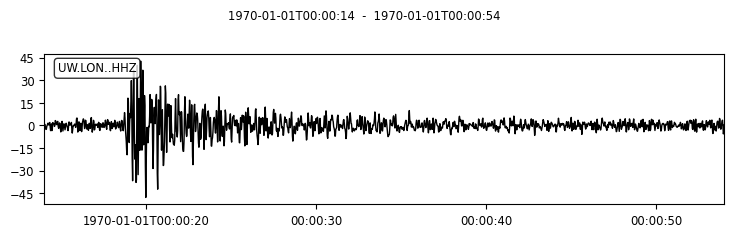

---
lonhhzrpra253 template original stream:


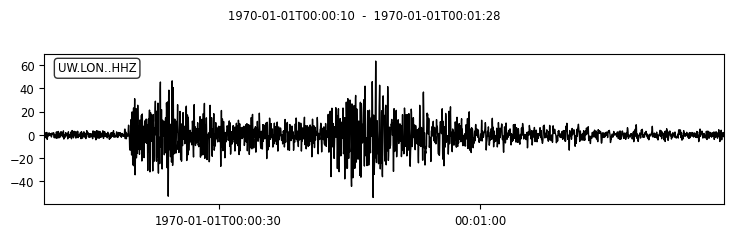

number of windows: 39
maximum amp window index: 10
Max Window:


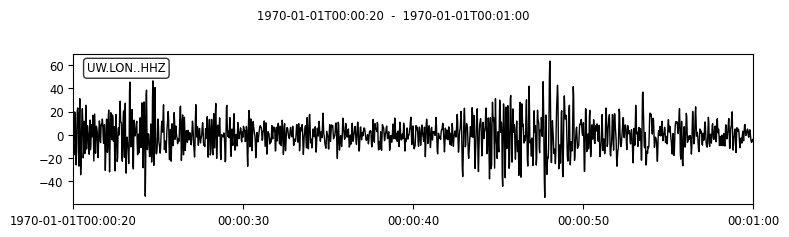

---
lonhhzrpra256 template original stream:


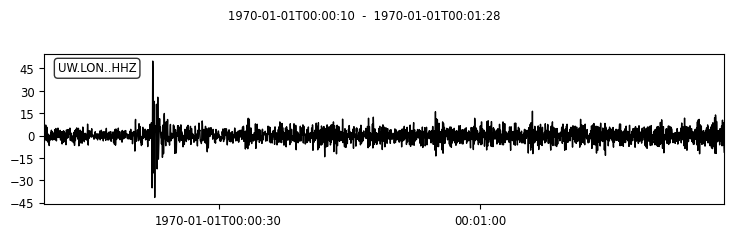

number of windows: 39
maximum amp window index: 12
Max Window:


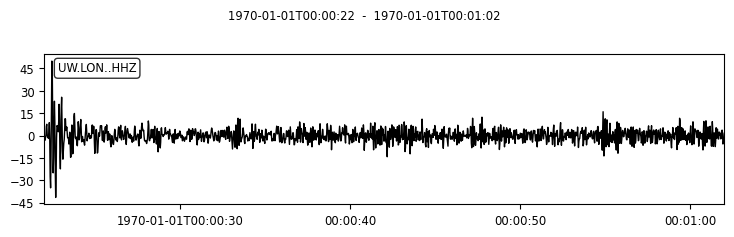

---
lonhhzrpra257 template original stream:


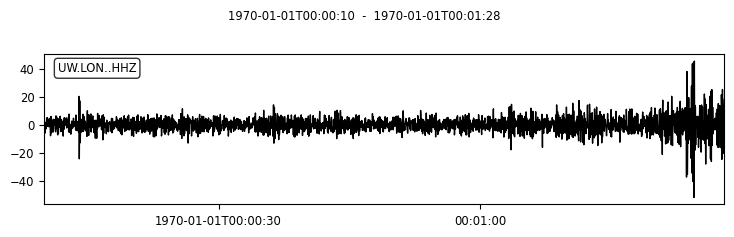

number of windows: 39
maximum amp window index: 38
Max Window:


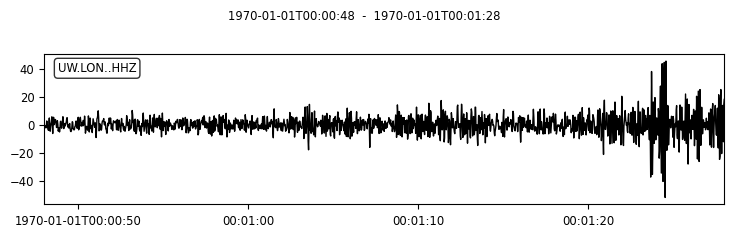

---
lonhhzrpra258 template original stream:


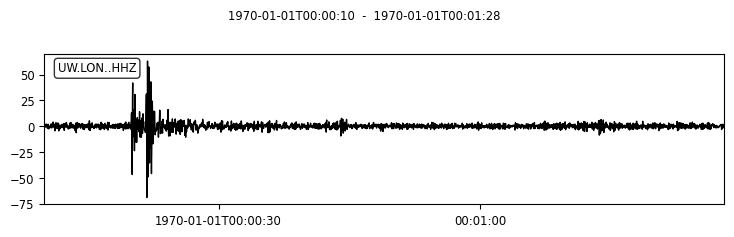

number of windows: 39
maximum amp window index: 1
Max Window:


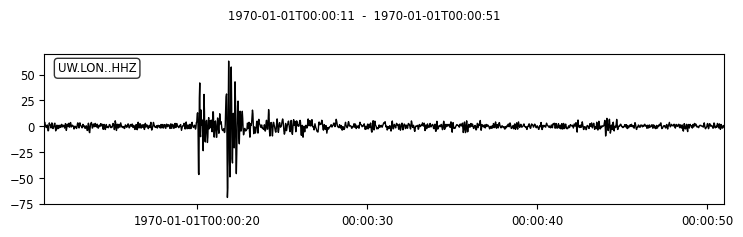

---
lonhhzrpra259 template original stream:


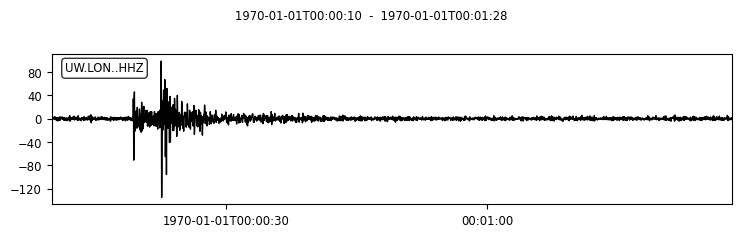

number of windows: 39
maximum amp window index: 2
Max Window:


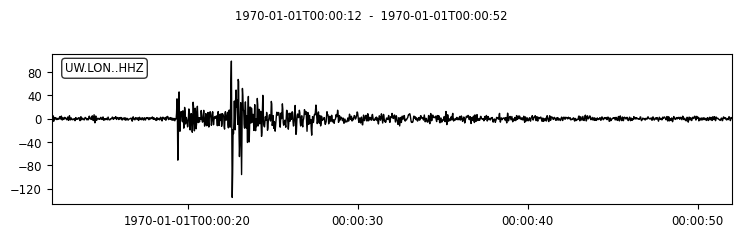

---
lonhhzrpra271 template original stream:


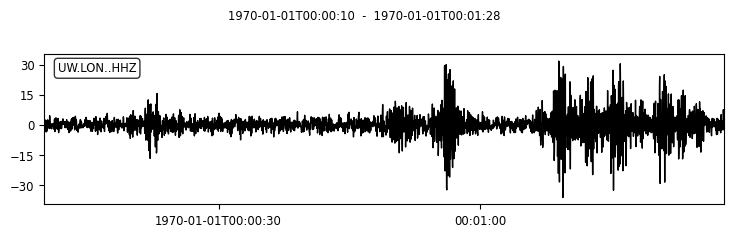

number of windows: 39
maximum amp window index: 38
Max Window:


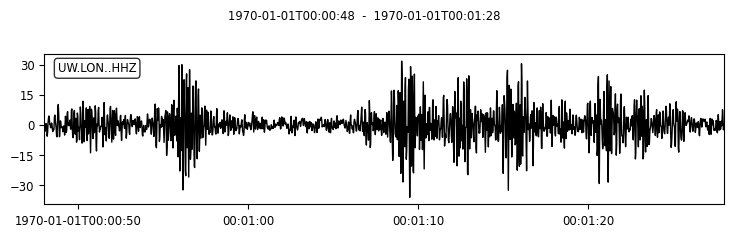

---
lonhhzrpra280 template original stream:


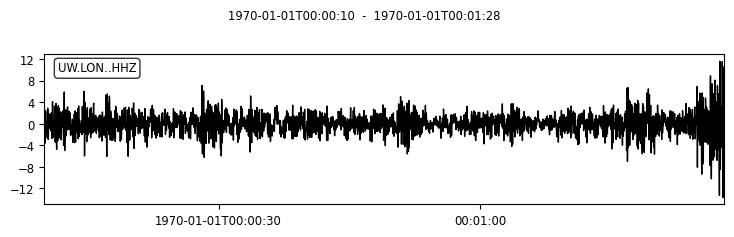

number of windows: 39
maximum amp window index: 38
Max Window:


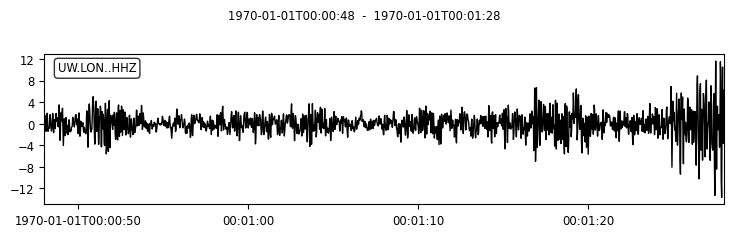

---
lonhhzrpra281 template original stream:


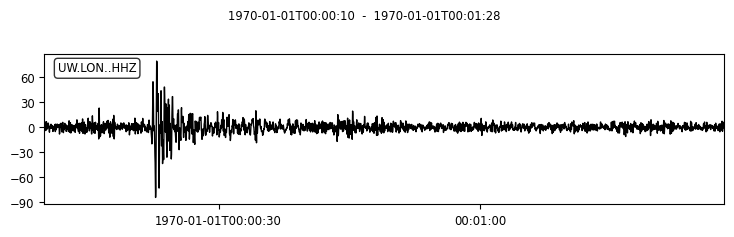

number of windows: 39
maximum amp window index: 2
Max Window:


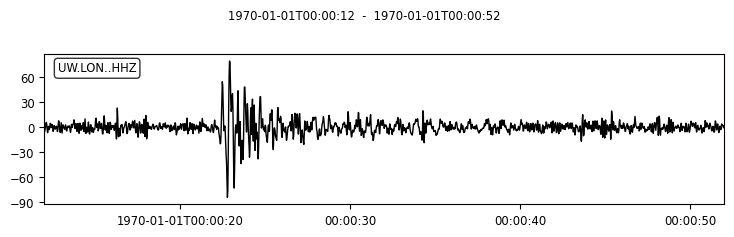

---
lonhhzrpra283 template original stream:


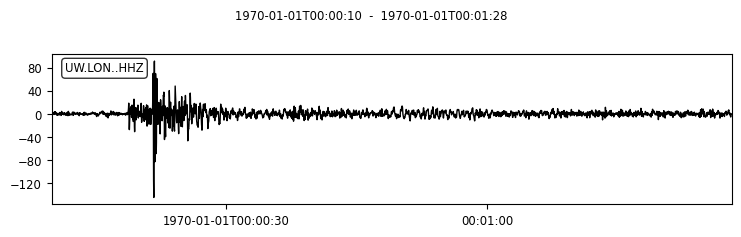

number of windows: 39
maximum amp window index: 9
Max Window:


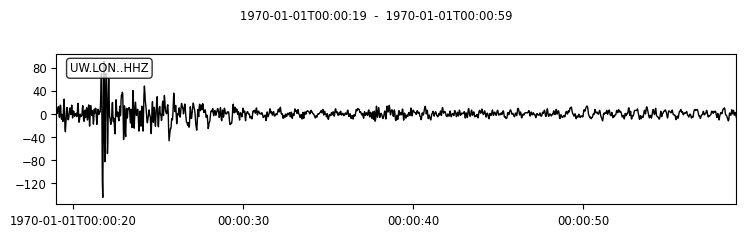

---
lonhhzrpra287 template original stream:


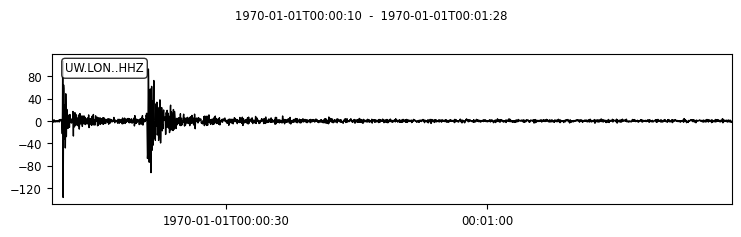

number of windows: 39
maximum amp window index: 1
Max Window:


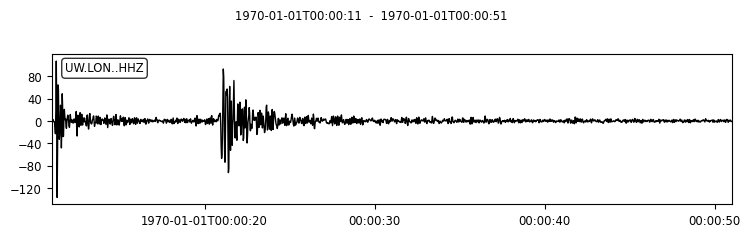

---
lonhhzrpra296 template original stream:


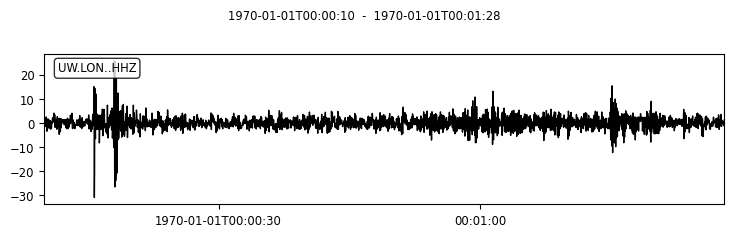

number of windows: 39
maximum amp window index: 36
Max Window:


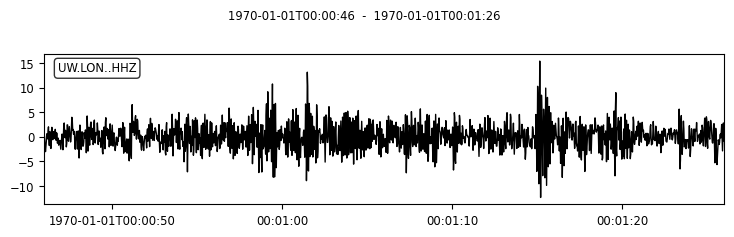

---
lonhhzrpra297 template original stream:


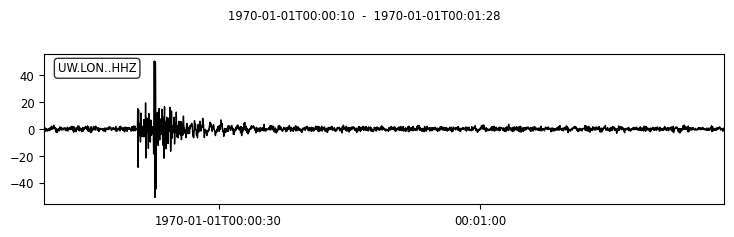

number of windows: 39
maximum amp window index: 3
Max Window:


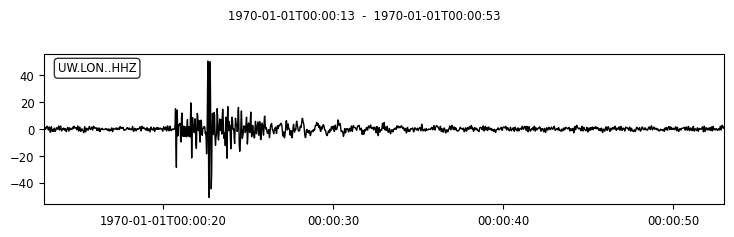

---
lonhhzrpra302 template original stream:


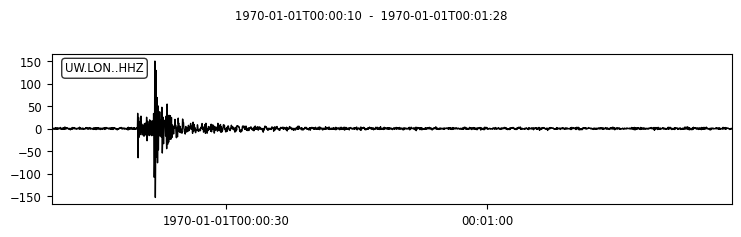

number of windows: 39
maximum amp window index: 5
Max Window:


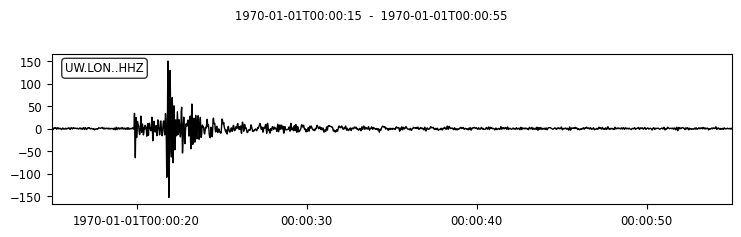

---
lonhhzrpra303 template original stream:


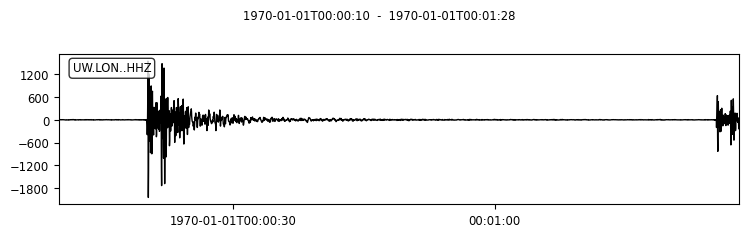

number of windows: 39
maximum amp window index: 10
Max Window:


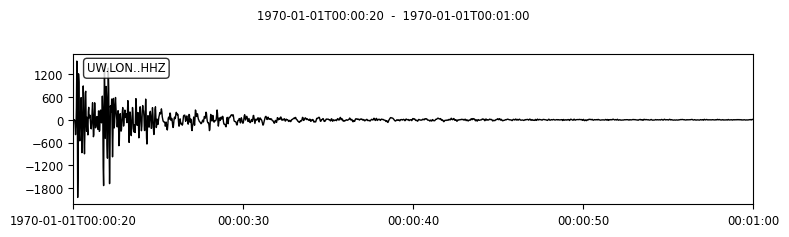

---
lonhhzrpra315 template original stream:


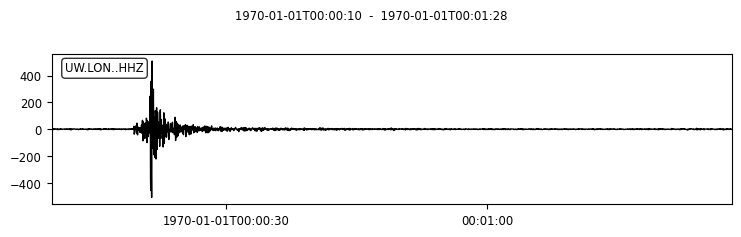

number of windows: 39
maximum amp window index: 6
Max Window:


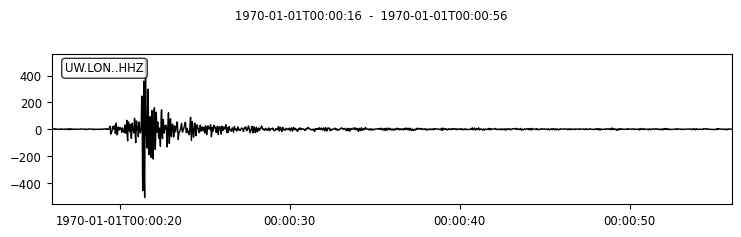

---
lonhhzrpra323 template original stream:


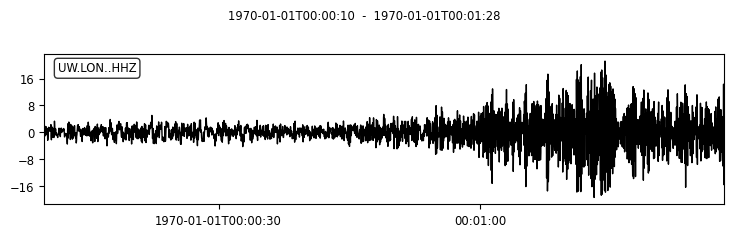

number of windows: 39
maximum amp window index: 38
Max Window:


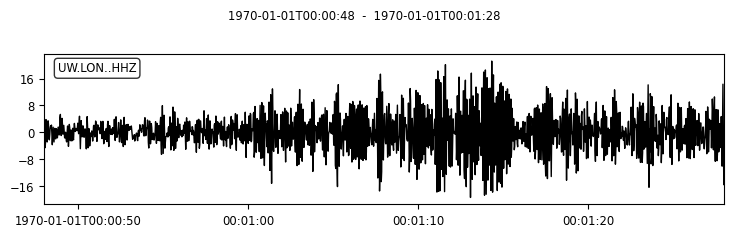

---
lonhhzrpra325 template original stream:


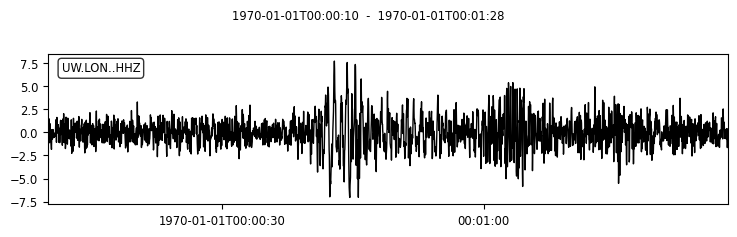

number of windows: 39
maximum amp window index: 30
Max Window:


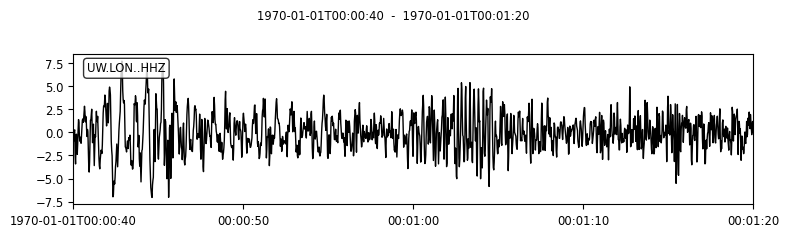

---
lonhhzrpra326 template original stream:


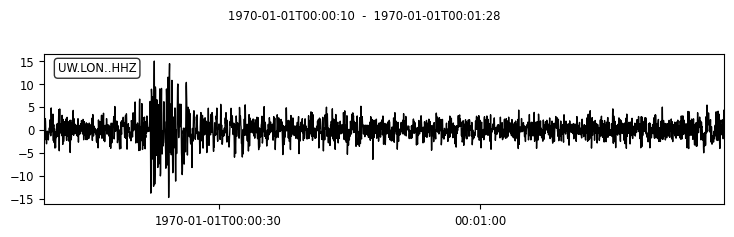

number of windows: 39
maximum amp window index: 0
Max Window:


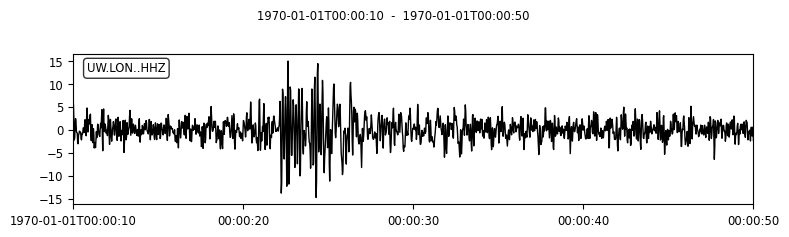

---
lonhhzrpra333 template original stream:


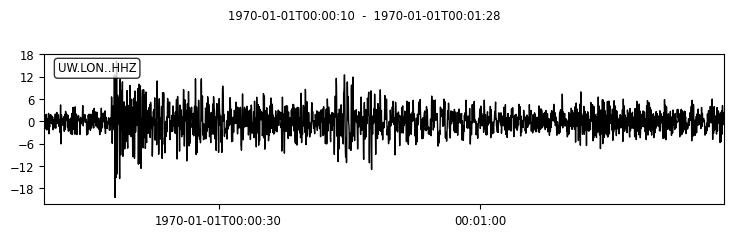

number of windows: 39
maximum amp window index: 7
Max Window:


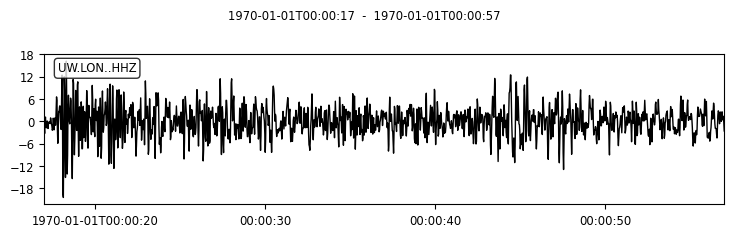

---
lonhhzrpra336 template original stream:


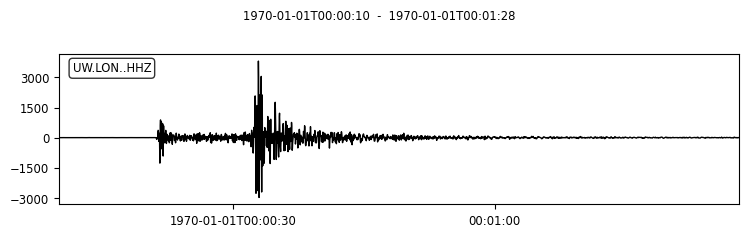

number of windows: 39
maximum amp window index: 11
Max Window:


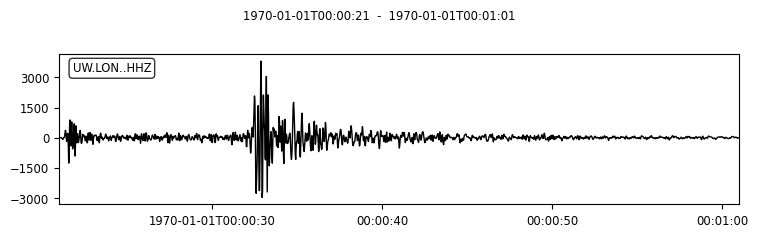

---
lonhhzrpra337 template original stream:


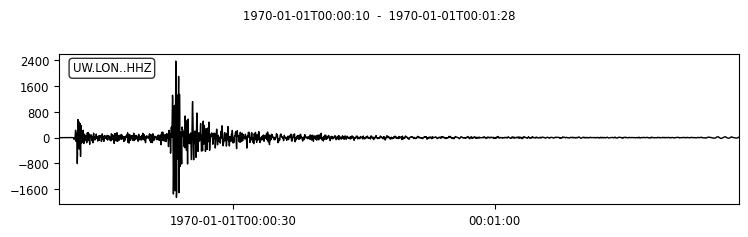

number of windows: 39
maximum amp window index: 1
Max Window:


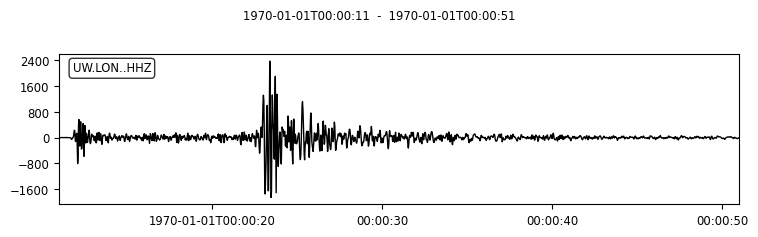

---
lonhhzrpra340 template original stream:


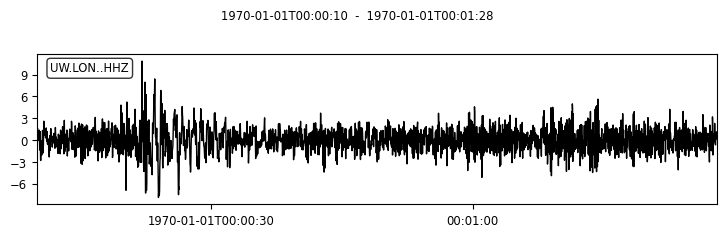

number of windows: 39
maximum amp window index: 4
Max Window:


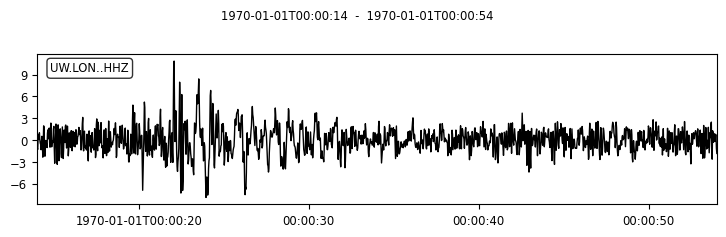

---
lonhhzrpra341 template original stream:


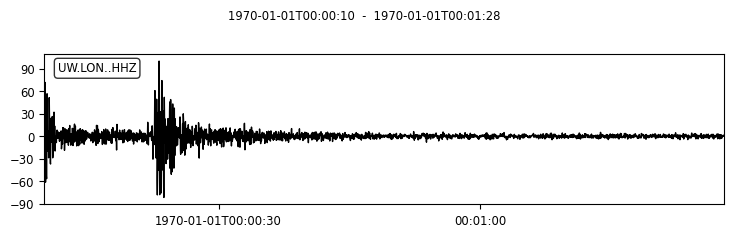

number of windows: 39
maximum amp window index: 0
Max Window:


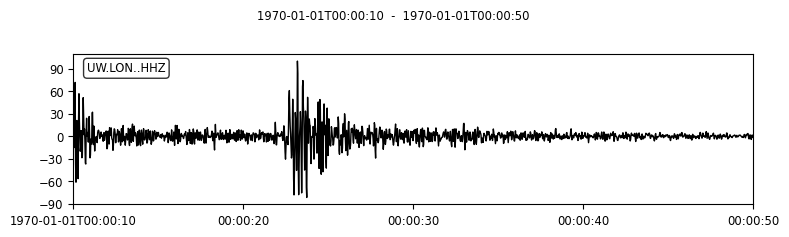

---
lonhhzrpra347 template original stream:


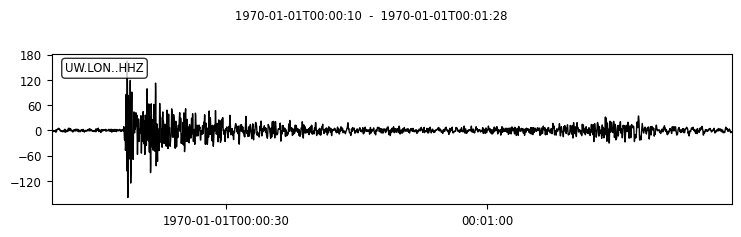

number of windows: 39
maximum amp window index: 8
Max Window:


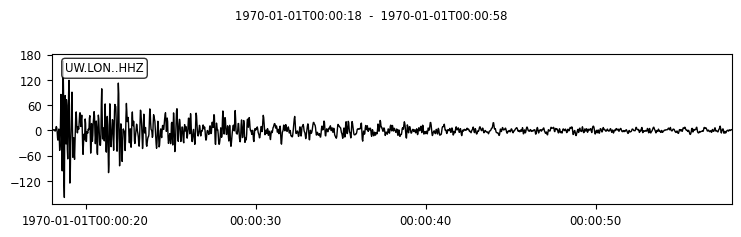

---
lonhhzrpra355 template original stream:


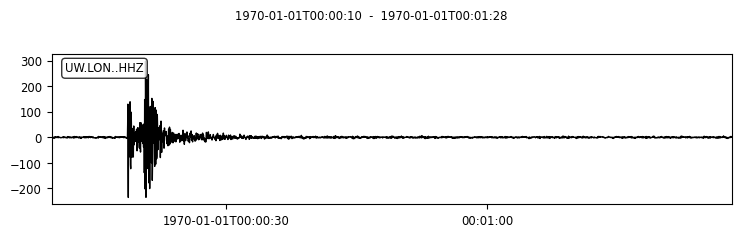

number of windows: 39
maximum amp window index: 4
Max Window:


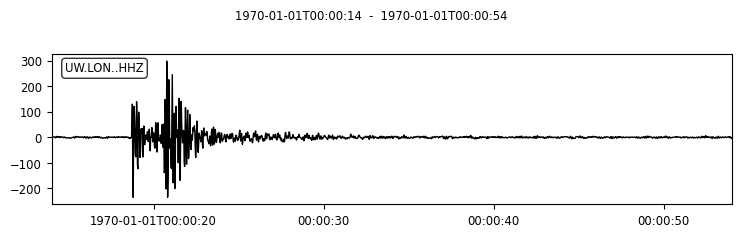

---
lonhhzrpra357 template original stream:


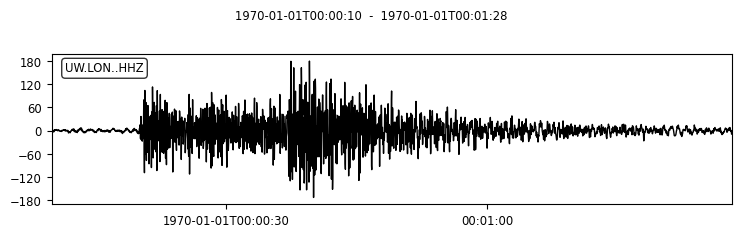

number of windows: 39
maximum amp window index: 10
Max Window:


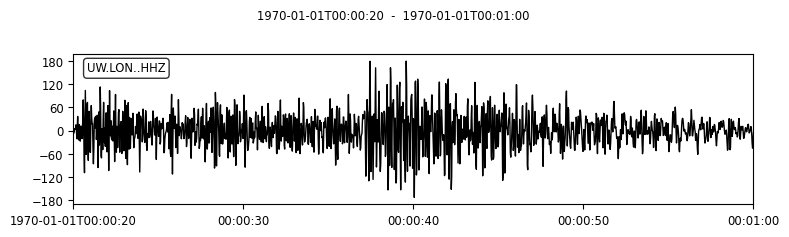

---
lonhhzrpra359 template original stream:


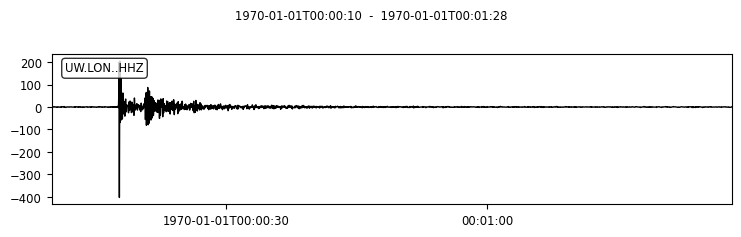

number of windows: 39
maximum amp window index: 7
Max Window:


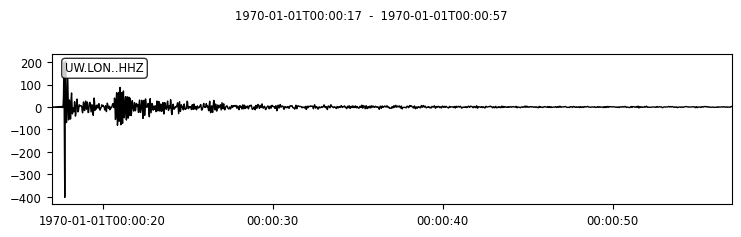

---
lonhhzrpra363 template original stream:


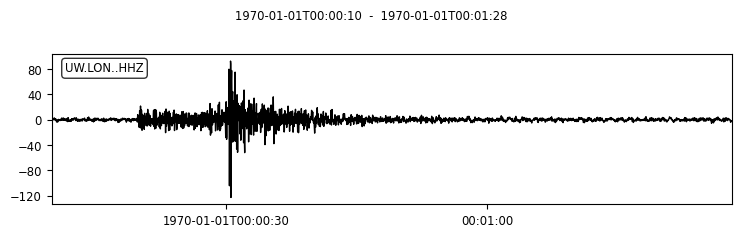

number of windows: 39
maximum amp window index: 9
Max Window:


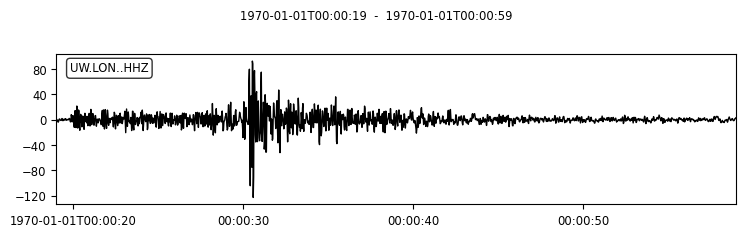

---
lonhhzrpra364 template original stream:


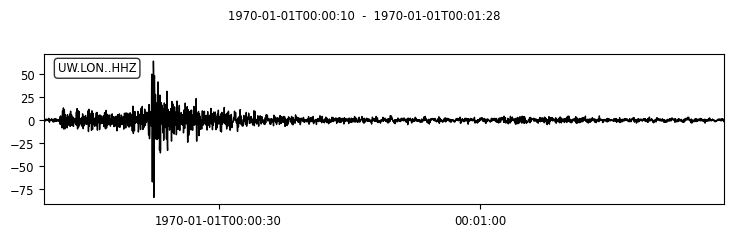

number of windows: 39
maximum amp window index: 1
Max Window:


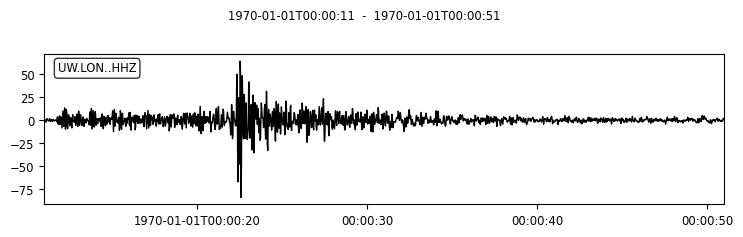

---
lonhhzrpra365 template original stream:


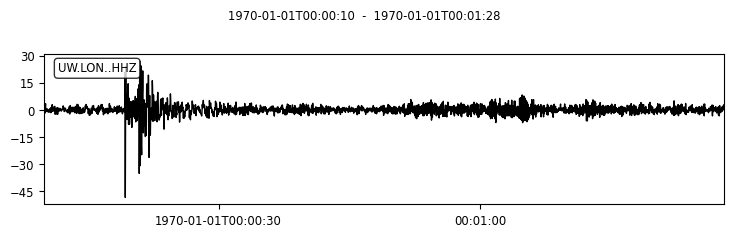

number of windows: 39
maximum amp window index: 9
Max Window:


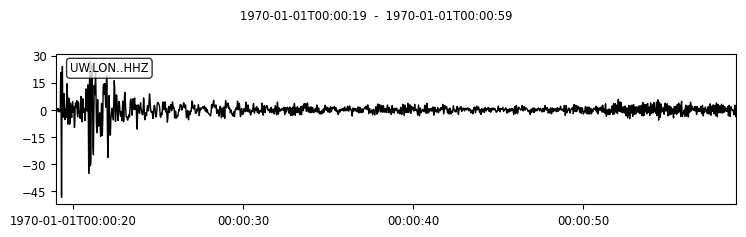

---
lonhhzrpra368 template original stream:


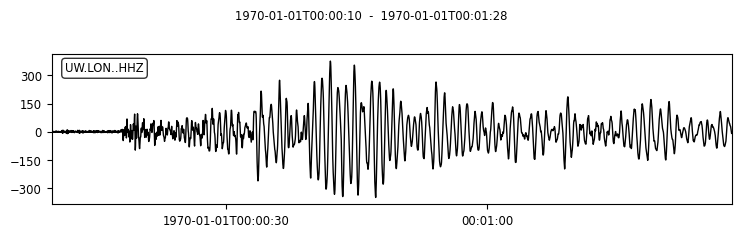

number of windows: 39
maximum amp window index: 20
Max Window:


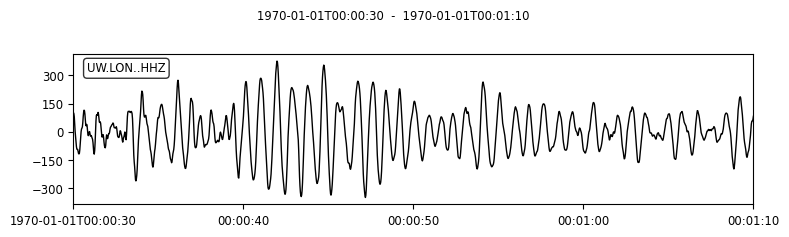

---
lonhhzrpra370 template original stream:


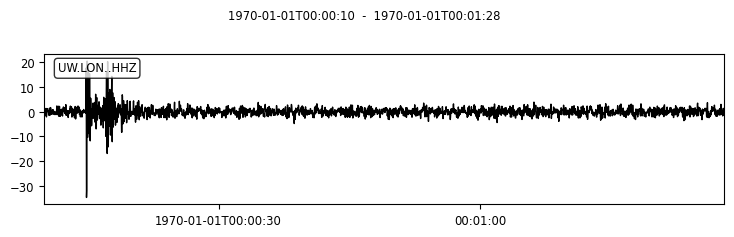

number of windows: 39
maximum amp window index: 1
Max Window:


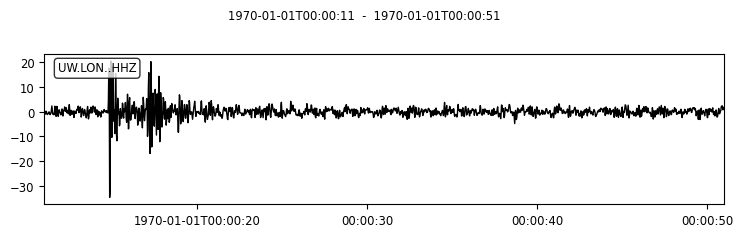

---
lonhhzrpra371 template original stream:


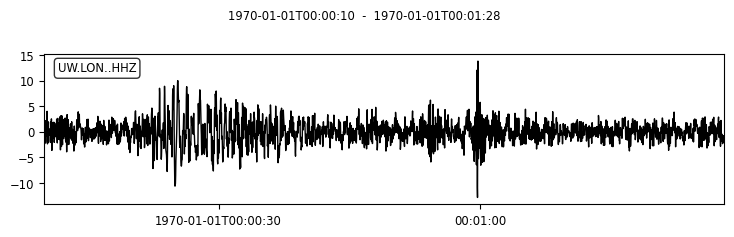

number of windows: 39
maximum amp window index: 12
Max Window:


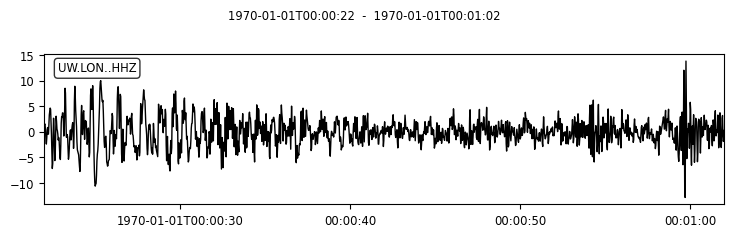

---
lonhhzrpra375 template original stream:


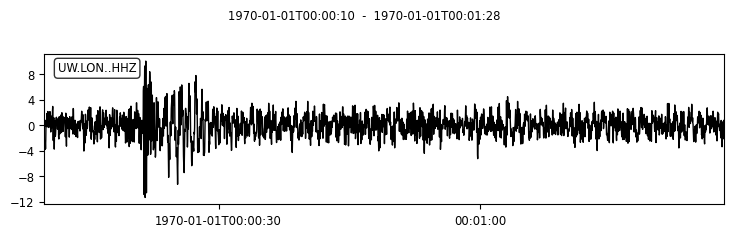

number of windows: 39
maximum amp window index: 5
Max Window:


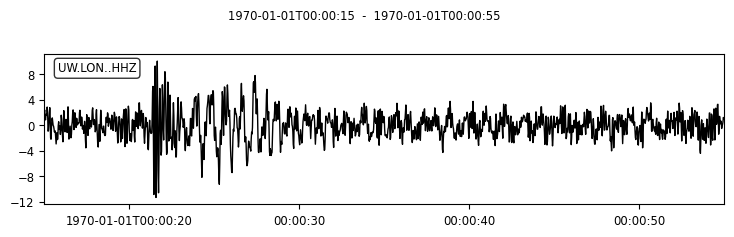

---
lonhhzrpra377 template original stream:


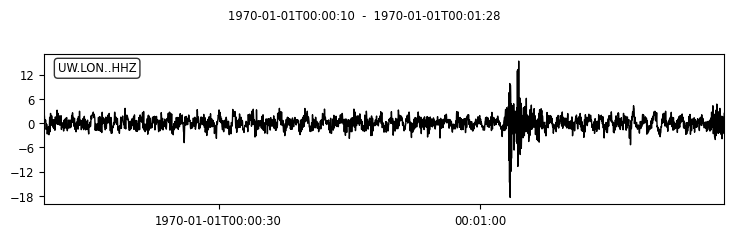

number of windows: 39
maximum amp window index: 38
Max Window:


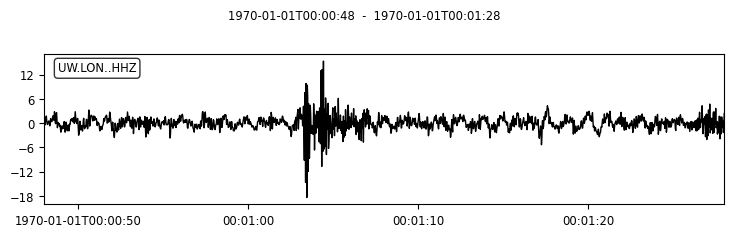

---
lonhhzrpra378 template original stream:


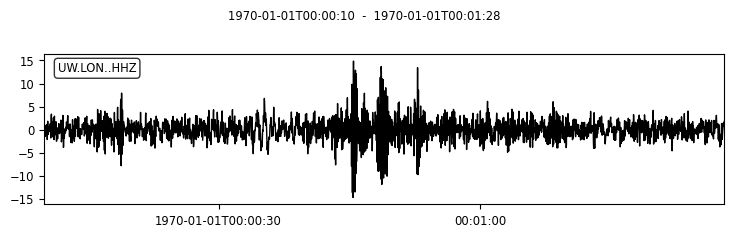

number of windows: 39
maximum amp window index: 19
Max Window:


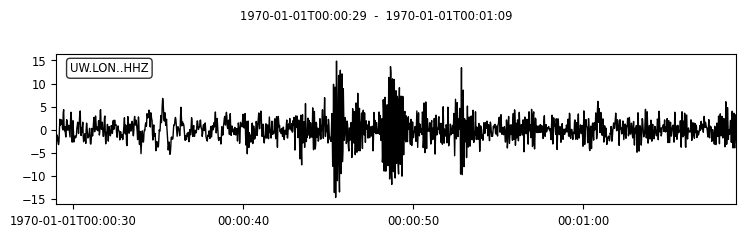

---
lonhhzrpra379 template original stream:


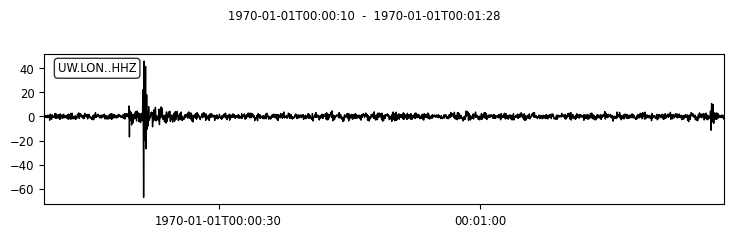

number of windows: 39
maximum amp window index: 9
Max Window:


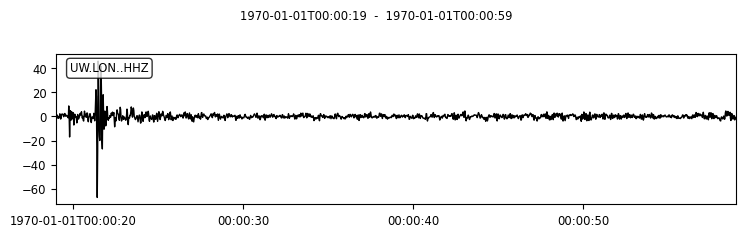

---
lonhhzrpra381 template original stream:


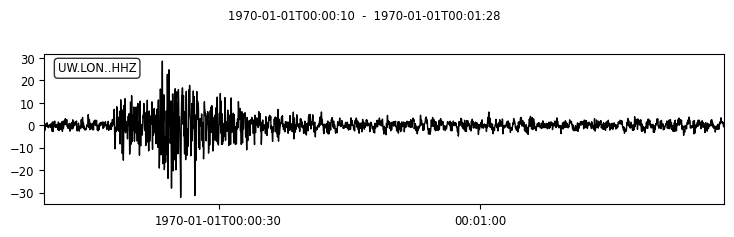

number of windows: 39
maximum amp window index: 8
Max Window:


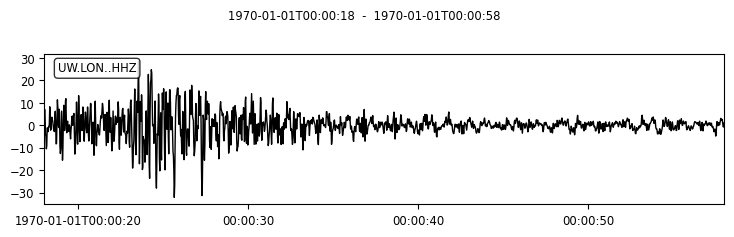

---
lonhhzrpra382 template original stream:


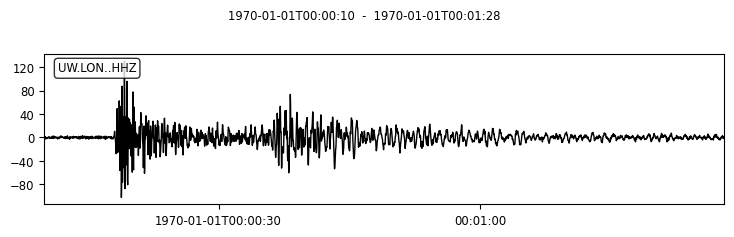

number of windows: 39
maximum amp window index: 8
Max Window:


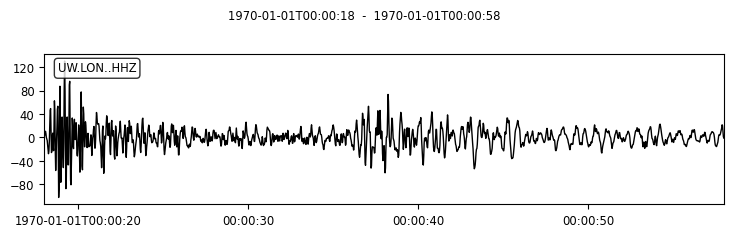

---
lonhhzrpra403 template original stream:


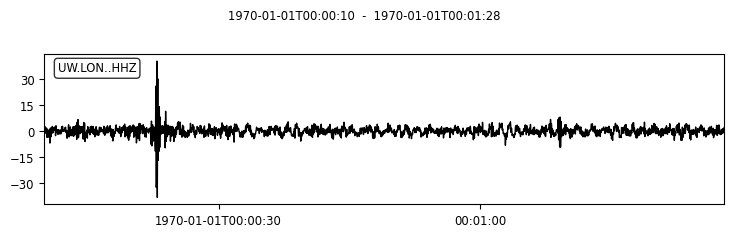

number of windows: 39
maximum amp window index: 3
Max Window:


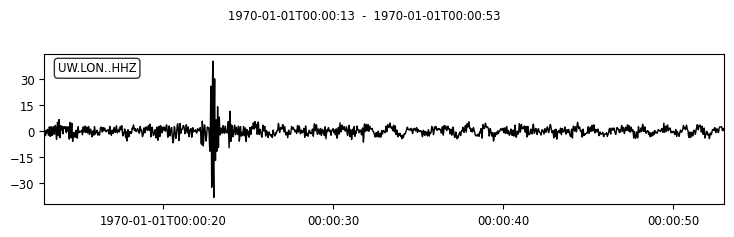

---


In [57]:
tdf = pd.DataFrame(data={'template_name':[],'waveform':[]}) #make a two column dataframe with labels

for f_name in glob(f'{path}{filename}'): #loop thru tgz files at a volcano
    T = Tribe().read(f_name)

    for t in T: #loop thru tgz file
        print(f'{t.name} template original stream:') #show original stream

        t.st.plot();

        max_stream = maxwindow(st=t.st,winlen=winlen) #maxwindow func
        
        ###
        #INTEGRATE NETWORK NAME FROM f_name INTO t.name SO THAT DIFF NETWORK, SAME STATION NAME ARE NOT CONFUSED #
        ###
        tdf.loc[len(tdf)+1] = [t.name,max_stream[0].data] #add this trimmed template to the df at index len+1 
#         max_stream[0].spectrogram() #show spectrogram
        print('---') #barrier

#         break
    break

In [58]:
tdf_spare = tdf.copy() #create a copy of the unaltered df for easier testing
#tdf = tdf_spare #make tdf refer to this copy

In [59]:
#test tdf
tdf

template_name                                           waveform
1       lonrpra003  [1.6191634017703354, 1.3213314408348678, -0.08...
2       lonrpra005  [433.1925212451217, 316.17190391316166, -219.9...
3    lonbhzrpra007  [-1.7971256461574279, -2.6506120806886013, -1....
4    lonbhzrpra008  [-0.9687833363884936, -0.8920713851800576, -1....
5    lonbhzrpra013  [2.399170774856175, 15.068421254790765, 63.115...
..             ...                                                ...
118  lonhhzrpra378  [-1.5964594237457632, -2.4437099461810834, -1....
119  lonhhzrpra379  [-0.8599471168440876, 1.4100434008653757, 0.45...
120  lonhhzrpra381  [2.839423597753321, 7.122745786121968, 3.55367...
121  lonhhzrpra382  [0.7091261935494653, 3.796031549332092, 8.3383...
122  lonhhzrpra403  [2.3925644299087927, -0.4008824416254658, -1.7...

[122 rows x 2 columns]

Calculate spectrograms from trimmed template df

In [60]:
fSTFT, tSTFT, STFT_raw = sp.spectrogram(
    x=np.stack(tdf["waveform"].values),
    fs=fs,
    nperseg=nperseg,
    noverlap=noverlap,
    nfft=nfft,
    scaling=sgramScaling,
    axis=-1,
    mode=sgramMode
)

In [61]:
#quality check
np.isnan(STFT_raw).any()

False

In [62]:
#bandpass filter, optional
freq_slice = np.where((fSTFT >= fqmin) & (fSTFT <= fqmax))
fSTFT   = fSTFT[freq_slice]
STFT_0 = STFT_raw[:,freq_slice,:].squeeze()

In [63]:
normConstant = np.median(STFT_0, axis=(1,2))
STFT_norm = STFT_0 / normConstant[:,np.newaxis,np.newaxis]  # norm by median
del STFT_0
STFT_dB = 20*np.log10(STFT_norm, where=STFT_norm != 0) # convert to dB
del STFT_norm
STFT = np.maximum(0, STFT_dB) # make sure nonnegative
del STFT_dB

tdf["stft"] = list(STFT)
tdf.head()

template_name                                           waveform  \
1     lonrpra003  [1.6191634017703354, 1.3213314408348678, -0.08...   
2     lonrpra005  [433.1925212451217, 316.17190391316166, -219.9...   
3  lonbhzrpra007  [-1.7971256461574279, -2.6506120806886013, -1....   
4  lonbhzrpra008  [-0.9687833363884936, -0.8920713851800576, -1....   
5  lonbhzrpra013  [2.399170774856175, 15.068421254790765, 63.115...   

                                                stft  
1  [[1.831349149400188, 0.0, 0.0, 2.0527750756385...  
2  [[4.604852584689613, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [[15.129007747556145, 10.2423318325612, 5.0312...  
4  [[20.56805021106929, 22.041925596549532, 18.45...  
5  [[19.105674053146707, 17.405837232344453, 19.8...

In [64]:
#quality check
bad_idx = tdf["stft"][tdf["stft"].apply(lambda x: np.isnan(x).any())].index
print(f"Bad spectrograms: \n{tdf.loc[bad_idx].template_name}")
tdf = tdf.drop(bad_idx).sort_values("template_name")

Bad spectrograms: 
Series([], Name: template_name, dtype: object)


/tmp/ipykernel_510278/4288673595.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolormesh(tSTFT,fSTFT,STFT_raw[n_spectrogram,freq_slice,:].squeeze())
/tmp/ipykernel_510278/4288673595.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(tSTFT,fSTFT, STFT[n_spectrogram])


Text(0.5, 1.0, 'Normalized spectrogram')

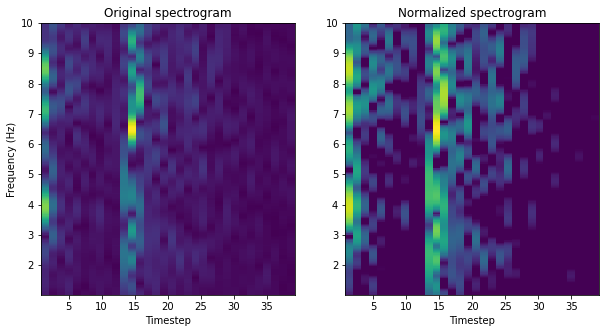

In [65]:
#plotting example spectrogram
n_spectrogram = 0 # index of spectrogram to plot

f, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].pcolormesh(tSTFT,fSTFT,STFT_raw[n_spectrogram,freq_slice,:].squeeze())
ax[0].set_xlabel("Timestep")
ax[0].set_ylabel("Frequency (Hz)")
ax[0].set_title("Original spectrogram")

ax[1].pcolormesh(tSTFT,fSTFT, STFT[n_spectrogram])
ax[1].set_xlabel("Timestep")
ax[1].set_title("Normalized spectrogram")

## Run Specufex